Using machine learning to predict who benefited most from digital inclusion project, in terms of economic status by considering the after rating score (post project).  In addition, to are those most at risk of digital exclusion being fairly assessed by the model.

In [5]:
# working with data
from math import sqrt
import math

# producing graphs
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
import numpy as np
import pandas as pd
import statsmodels.api as sm


# pre-processing data ready for machine learning
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# splitting the data
from sklearn.model_selection import train_test_split

# selected algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC

# cross validation and model optimisation tools for the models
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, roc_auc_score
from pprint import pprint
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


DATA COLLECTION AND ANALYSIS

In [6]:
# Load synthentic Impact Form dataset
file_path = r"c:\users\nicol\local_repository_ICA\machine_learning\updated_mock_impact_data.xlsx"
df = pd.read_excel(file_path)
# Save as CSV
df.to_csv("mock_impact_data.csv", index=False)

In [7]:
# check the size of the dataset
print('Number of records in dataset: ', len(df.index))
print('Number of columns in dataset: ', len(df.columns))

Number of records in dataset:  1500
Number of columns in dataset:  29


In [8]:
df 

,ID Number,firstname,surname,email,age,postcode,economicStatus,assisttech,accesslearn,supportcarer,...,a.deviceSettings,a.publicWifi,a.onlineSearches,a.appUse,a.onlineForms,a.onlinePayments,a.storageCheck,a.passwords,a.spottingScams,a.reportingScams
0,1,Nicole,Wilson,joshuamoore@example.org,46 to 65,SR1,Economically inactive,no,yes,yes,...,1,1,1,1,1,1,1,1,1,1
1,2,Cheryl,Murphy,hbrown@example.com,46 to 65,SR1,Unemployed,yes,yes,yes,...,2,2,2,2,2,3,3,3,3,3
2,4,Anna,Gomez,wwilson@example.com,30 to 45,SR1,Student,yes,yes,no,...,1,1,1,1,1,1,1,1,1,1
3,5,Cynthia,Martinez,phillipsnancy@example.net,11 to 18,SR1,Self-employed,no,no,yes,...,2,2,2,2,2,3,3,3,3,3
4,6,Richard,Davis,robert89@example.net,19 to 29,SR1,Student,no,no,no,...,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,1464,Maria,Miller,rebeccayoung@example.org,66+,SR6,Economically inactive,yes,no,no,...,2,2,2,2,2,2,2,2,2,2
1496,1466,Steven,Griffith,dawnwashington@example.org,46 to 65,SR6,Unemployed,no,no,yes,...,1,1,1,1,1,1,1,1,1,1
1497,1469,Brenda,Bowman,christinemendez@example.org,46 to 65,SR6,Retired,no,no,no,...,2,2,2,2,2,2,2,2,2,2
1498,1490,Jennifer,Nelson,chelsea23@example.com,46 to 65,SR6,Retired,no,no,no,...,1,1,1,1,1,1,1,1,1,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID Number         1500 non-null   int64 
 1   firstname         1500 non-null   object
 2   surname           1500 non-null   object
 3   email             1500 non-null   object
 4   age               1500 non-null   object
 5   postcode          1500 non-null   object
 6   economicStatus    1500 non-null   object
 7   assisttech        1500 non-null   object
 8   accesslearn       1500 non-null   object
 9   supportcarer      1500 non-null   object
 10  socialtariff      1500 non-null   object
 11  freeinternet      1500 non-null   object
 12  freedevice        1500 non-null   object
 13  usageBefore       1500 non-null   object
 14  usageAfter        1500 non-null   object
 15  typeSupport       1500 non-null   object
 16  durationSupport   1500 non-null   int64 
 17  beforerate    

In [10]:
# view basic statistical details about the dataset
df.describe()

,ID Number,durationSupport,beforerate,afterrate,a.deviceSettings,a.publicWifi,a.onlineSearches,a.appUse,a.onlineForms,a.onlinePayments,a.storageCheck,a.passwords,a.spottingScams,a.reportingScams
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,750.500000,5.106000,1.379333,3.187333,1.279333,1.279333,1.279333,1.279333,1.279333,1.282667,1.282667,1.282667,1.282667,1.291333
std,433.157015,1.203216,0.485383,0.923476,0.448821,0.448821,0.448821,0.448821,0.448821,0.457791,0.457791,0.457791,0.457791,0.461808
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,375.750000,4.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,750.500000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,1125.250000,6.000000,2.000000,4.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,1500.000000,6.000000,2.000000,4.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000


SECTION SUMMARY
Data Frame: Sourced from C:/Drive.  The dataset used in this study was custom-built, derived from responses submitted via the Impact Form within the web application (the second artefact).  Python was employed to import, preview and explore the data.  The dataset comprises of 1500 records and 29 attributes, covering a range of variables including demographics information, access to digital resources, self-accessed digital confidence, and both pre and post support ratings, enabling comparative analysis.  This data includes a mix of textual and numerical fields. 

DATA PRE PROCESSING AND PREPARATION

In [11]:
# checking for missing values
df.isnull().sum()

ID Number           0
firstname           0
surname             0
email               0
age                 0
postcode            0
economicStatus      0
assisttech          0
accesslearn         0
supportcarer        0
socialtariff        0
freeinternet        0
freedevice          0
usageBefore         0
usageAfter          0
typeSupport         0
durationSupport     0
beforerate          0
afterrate           0
a.deviceSettings    0
a.publicWifi        0
a.onlineSearches    0
a.appUse            0
a.onlineForms       0
a.onlinePayments    0
a.storageCheck      0
a.passwords         0
a.spottingScams     0
a.reportingScams    0
dtype: int64

In [12]:
# checking for duplicated values
df.duplicated().sum()

np.int64(0)

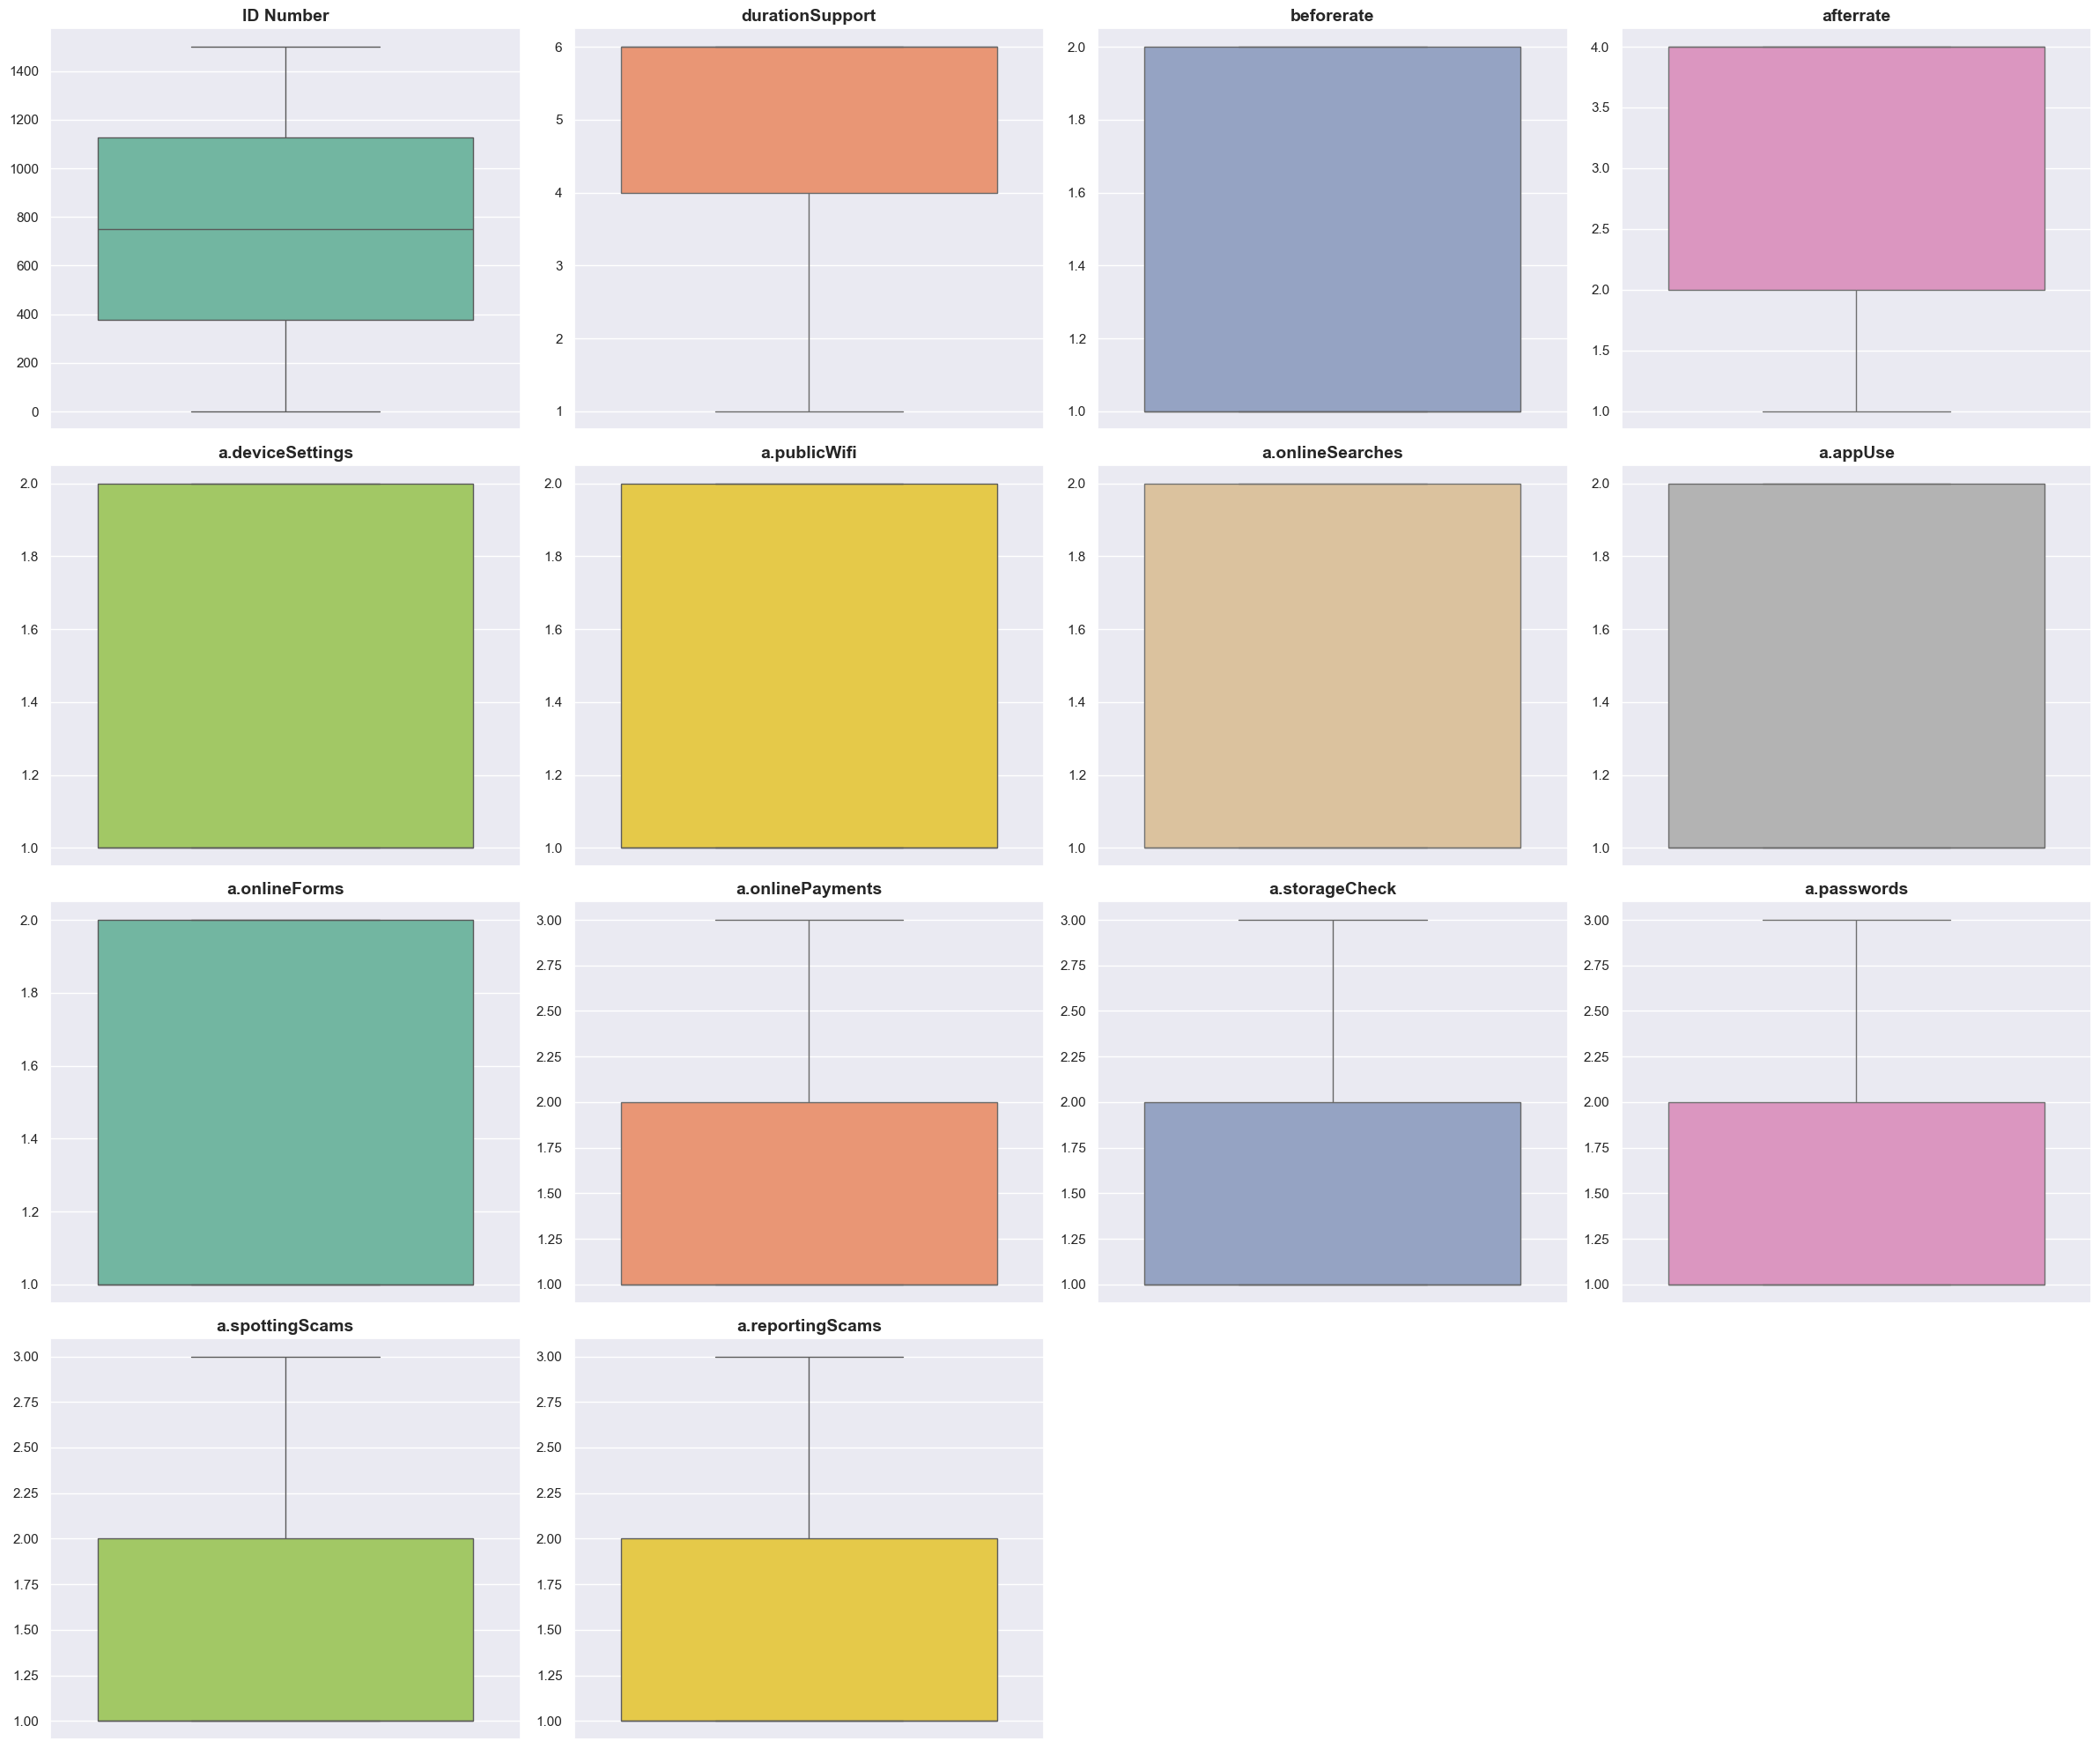

In [13]:
# Select numeric columns
num_cols = df.select_dtypes(include="number").columns
num_plots = len(num_cols)

# Set up the grid
cols_per_row = 4
rows = math.ceil(num_plots / cols_per_row)

fig, axes = plt.subplots(rows, cols_per_row, figsize=(6 * cols_per_row, 5 * rows))
axes = axes.flatten()

# Get Set2 palette
palette = sns.color_palette("Set2", num_plots)

# Create boxplots with individual colours
for i, col in enumerate(num_cols):
    sns.boxplot(data=df, y=col, ax=axes[i], color=palette[i])
    axes[i].set_title(col, fontsize=14, weight="bold")
    axes[i].set_ylabel("")

# Turn off unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis("off")

plt.tight_layout()
plt.show()

The dataset was well structured, with no missing values, corrupted entries, or detectable outliners based on initial indicators.  This provided a clean foundation for analysis.

FEATURE ENGINEERING

In [14]:
df

,ID Number,firstname,surname,email,age,postcode,economicStatus,assisttech,accesslearn,supportcarer,...,a.deviceSettings,a.publicWifi,a.onlineSearches,a.appUse,a.onlineForms,a.onlinePayments,a.storageCheck,a.passwords,a.spottingScams,a.reportingScams
0,1,Nicole,Wilson,joshuamoore@example.org,46 to 65,SR1,Economically inactive,no,yes,yes,...,1,1,1,1,1,1,1,1,1,1
1,2,Cheryl,Murphy,hbrown@example.com,46 to 65,SR1,Unemployed,yes,yes,yes,...,2,2,2,2,2,3,3,3,3,3
2,4,Anna,Gomez,wwilson@example.com,30 to 45,SR1,Student,yes,yes,no,...,1,1,1,1,1,1,1,1,1,1
3,5,Cynthia,Martinez,phillipsnancy@example.net,11 to 18,SR1,Self-employed,no,no,yes,...,2,2,2,2,2,3,3,3,3,3
4,6,Richard,Davis,robert89@example.net,19 to 29,SR1,Student,no,no,no,...,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,1464,Maria,Miller,rebeccayoung@example.org,66+,SR6,Economically inactive,yes,no,no,...,2,2,2,2,2,2,2,2,2,2
1496,1466,Steven,Griffith,dawnwashington@example.org,46 to 65,SR6,Unemployed,no,no,yes,...,1,1,1,1,1,1,1,1,1,1
1497,1469,Brenda,Bowman,christinemendez@example.org,46 to 65,SR6,Retired,no,no,no,...,2,2,2,2,2,2,2,2,2,2
1498,1490,Jennifer,Nelson,chelsea23@example.com,46 to 65,SR6,Retired,no,no,no,...,1,1,1,1,1,1,1,1,1,1


In [15]:
# Remove 'SR' and convert to integer, creating a deprivation ranking.  1 equals lowest deprivation, 6 equals highest deprivation    
df['postcode_score'] = df['postcode'].str.replace('SR', '').astype(int)
df.drop(columns=['postcode'], inplace=True)

# introduce a risk gradient for economic status
def encode_economic_status(economic):
    if economic == "Economically inactive":
        return 5
    elif economic == "Unemployed":
        return 4
    elif economic == "Retired":
        return 3
    elif economic == "Student":
        return 2
    elif economic == "Self-employed":
        return 1
    else:
        return 0  

df['economic_encoded'] = df['economicStatus'].apply(encode_economic_status)
df.drop(columns=['economicStatus'], inplace=True)


In [16]:
# identify yes and no columns ready to convert to binary
yes_no_map = {
    'yes': 1,
    'no': 0,
    'y': 1,
    'n': 0,
    'true': 1,
    'false': 0
}

yes_no_cols = ['assisttech', 'accesslearn', 'supportcarer', 'socialtariff', 'freeinternet', 
               'freedevice'] 
for col in yes_no_cols:
    print(f"{col}: {df[col].unique()}")
    
for col in yes_no_cols:
    df[col] = df[col].astype(str).str.strip().str.lower().replace(yes_no_map)
    df[col] = df[col].infer_objects(copy=False)
    
print(df[yes_no_cols].head())

assisttech: ['no' 'yes']
accesslearn: ['yes' 'no']
supportcarer: ['yes' 'no']
socialtariff: ['yes' 'no']
freeinternet: ['yes' 'no']
freedevice: ['yes' 'no']
   assisttech  accesslearn  supportcarer  socialtariff  freeinternet  \
0           0            1             1             1             1   
1           1            1             1             0             1   
2           1            1             0             0             1   
3           0            0             1             0             1   
4           0            0             0             0             1   

   freedevice  
0           1  
1           1  
2           1  
3           1  
4           1  


C:\Users\nicol\AppData\Local\Temp\ipykernel_7208\1261712631.py:17: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].astype(str).str.strip().str.lower().replace(yes_no_map)
C:\Users\nicol\AppData\Local\Temp\ipykernel_7208\1261712631.py:17: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].astype(str).str.strip().str.lower().replace(yes_no_map)
C:\Users\nicol\AppData\Local\Temp\ipykernel_7208\1261712631.py:17: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future 

In [17]:
# introduce a risk gradient for internet usage
def encode_usage_before(usageBefore):
    if usageBefore == "Rarely":
        return 3
    elif usageBefore == "Weekly":
        return 2
    elif usageBefore == "Daily":
        return 1

df['usageBefore_encoded'] = df['usageBefore'].apply(encode_usage_before)

# introduce a risk gradient for internet usage
def encode_usage_after(usageAfter):
    if usageAfter == "Rarely":
        return 3
    elif usageAfter == "Weekly":
        return 2
    else:
        return 1

df['usageAfter_encoded'] = df['usageAfter'].apply(encode_usage_after)


In [18]:
# sort, clean and list the distinct values in the typeSupport column
distinct_values = df['typeSupport'].dropna().astype(str).str.strip().str.title().unique()
print(sorted(distinct_values))

['1-2-1 Support', 'Access Data', 'Access Devices', 'Access To Data', 'Community Led Tutorials', 'Group Work', 'Help Desk', 'Online Courses', 'Workshops']


In [19]:
# one-hot coding was used, with each person only receiving one type of support
pd.get_dummies(df['typeSupport'], prefix='support')

# confirm type
dummies = pd.get_dummies(df['typeSupport'], prefix='support')
print(dummies.dtypes)

# merge back into df
df = pd.concat([df, dummies], axis=1)
support_columns = [col for col in df.columns if col.startswith('support_')]
print(df[support_columns].sum())

support_1-2-1 Support              bool
support_Access Data                bool
support_Access Devices             bool
support_Access to Data             bool
support_Community Led Tutorials    bool
support_Group work                 bool
support_Help Desk                  bool
support_Online Courses             bool
support_Workshops                  bool
dtype: object
support_1-2-1 Support              182
support_Access Data                 73
support_Access Devices             341
support_Access to Data             282
support_Community Led Tutorials     16
support_Group work                  83
support_Help Desk                  203
support_Online Courses             205
support_Workshops                  115
dtype: int64


In [20]:
df

,ID Number,firstname,surname,email,age,assisttech,accesslearn,supportcarer,socialtariff,freeinternet,...,usageAfter_encoded,support_1-2-1 Support,support_Access Data,support_Access Devices,support_Access to Data,support_Community Led Tutorials,support_Group work,support_Help Desk,support_Online Courses,support_Workshops
0,1,Nicole,Wilson,joshuamoore@example.org,46 to 65,0,1,1,1,1,...,1,False,False,True,False,False,False,False,False,False
1,2,Cheryl,Murphy,hbrown@example.com,46 to 65,1,1,1,0,1,...,2,False,False,False,True,False,False,False,False,False
2,4,Anna,Gomez,wwilson@example.com,30 to 45,1,1,0,0,1,...,2,False,False,True,False,False,False,False,False,False
3,5,Cynthia,Martinez,phillipsnancy@example.net,11 to 18,0,0,1,0,1,...,2,False,False,False,True,False,False,False,False,False
4,6,Richard,Davis,robert89@example.net,19 to 29,0,0,0,0,1,...,2,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,1464,Maria,Miller,rebeccayoung@example.org,66+,1,0,0,1,1,...,2,True,False,False,False,False,False,False,False,False
1496,1466,Steven,Griffith,dawnwashington@example.org,46 to 65,0,0,1,1,0,...,2,True,False,False,False,False,False,False,False,False
1497,1469,Brenda,Bowman,christinemendez@example.org,46 to 65,0,0,0,1,1,...,1,True,False,False,False,False,False,False,False,False
1498,1490,Jennifer,Nelson,chelsea23@example.com,46 to 65,0,0,0,1,1,...,1,False,False,False,True,False,False,False,False,False


In [21]:
df_usage = df.drop(['ID Number', 'firstname', 'surname', 'email', 'usageBefore', 'usageAfter', 'typeSupport'], axis=1)

In [22]:
# check the size of the dataset
print('Number of records in dataset: ', len(df_usage.index))
print('Number of columns in dataset: ', len(df_usage.columns))

Number of records in dataset:  1500
Number of columns in dataset:  33


To enhance model learning, several transformations were applied.  Postcode were cleaned by removing ‘SR’ prefix and converting them to integer, which enabled the creation of a deprivation ranking (1 = least deprived, 6 = most deprived.  A risk gradient was introduced for selected features: economic status categories were encoded based on insights from Good Things, economically inactive = 5, unemployed = 4, retired = 3, student =  2, self employed = 1 and employed = 0, reflecting their relative risk of digital exclusion.  Internet usage was similarly ranked, with ‘rarely’ assigned 3, ‘weekly’ 2 and ‘daily’ 1.  The support column was cleaned and categorised using one-hot encoding.  Binary conversation was applied to all yes and no fields.  Irrelevant or duplicated data, such as first names and email addresses were removed.  These enhancements increased the total number of attributes from 29 to 33

EXPLORATORY DATA ANAYLSIS

In [23]:
# compare distrubtion, skewness and outliers
%matplotlib inline
def explore_numeric_features(df_usage, figsize=(8, 2.5)):
    num_cols = df_usage.select_dtypes(include=np.number).columns.tolist()
    palette = sns.color_palette("Set2", len(num_cols)) 
    
    for i, col in enumerate(num_cols):
        color = palette[i]
        
        print(f"\n📊 Feature: {col}")
        print(f"Skewness: {round(df_usage[col].skew(), 2)}")

        plt.figure(figsize=figsize)

        # histogram and Kernal density estimage (KDE)
        plt.subplot(1, 2, 1)
        sns.histplot(df_usage[col], kde=True, color=color)
        plt.title(f"Distribution of '{col}'")
        plt.xlabel(col)
        plt.ylabel("Frequency")

        # boxplot
        plt.subplot(1, 2, 2)
        sns.boxplot(x=df_usage[col], color=color)
        plt.title(f"Outliers in '{col}'")

        plt.tight_layout()
        plt.show()


📊 Feature: assisttech
Skewness: 0.63


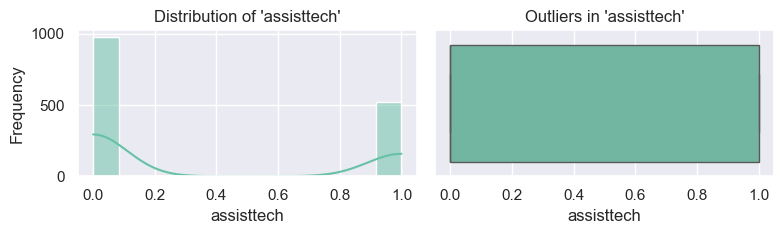


📊 Feature: accesslearn
Skewness: 0.65


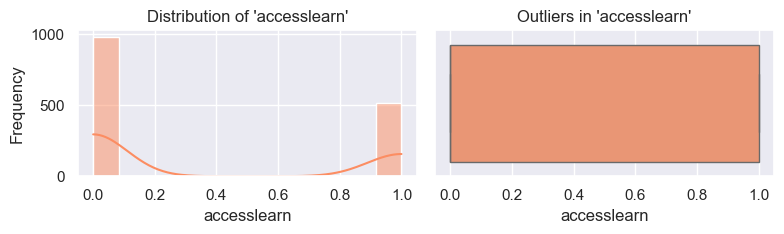


📊 Feature: supportcarer
Skewness: 0.74


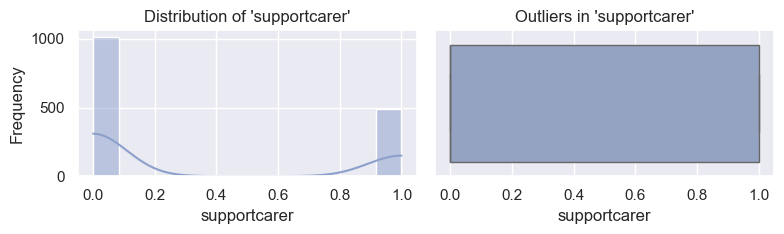


📊 Feature: socialtariff
Skewness: 0.38


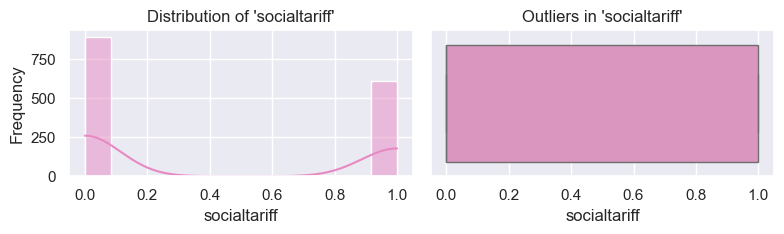


📊 Feature: freeinternet
Skewness: -0.91


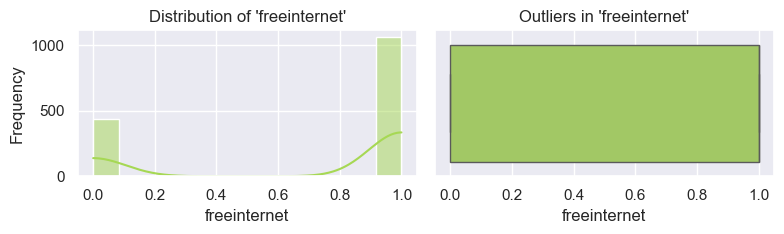


📊 Feature: freedevice
Skewness: -0.91


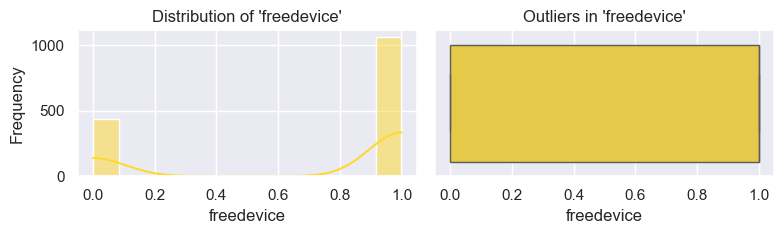


📊 Feature: durationSupport
Skewness: -1.22


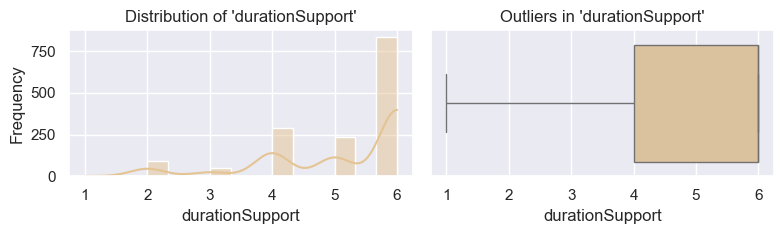


📊 Feature: beforerate
Skewness: 0.5


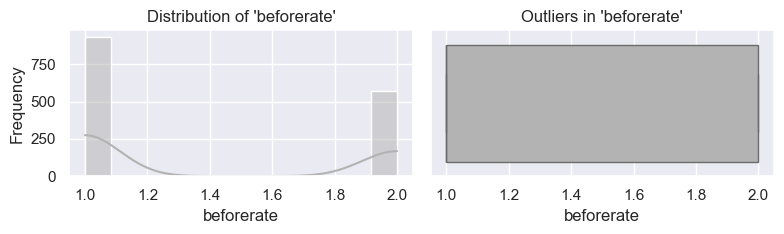


📊 Feature: afterrate
Skewness: -0.61


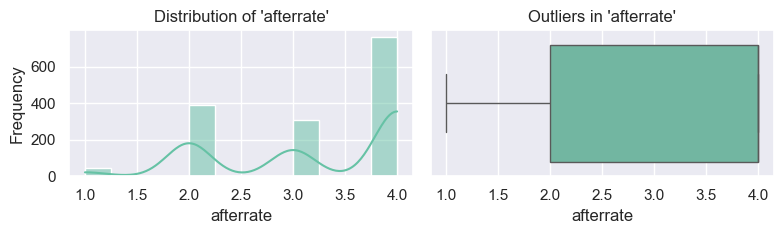


📊 Feature: a.deviceSettings
Skewness: 0.98


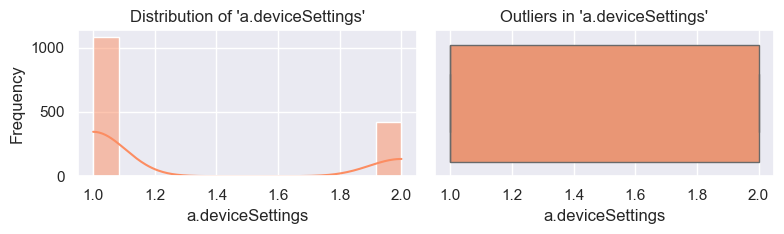


📊 Feature: a.publicWifi
Skewness: 0.98


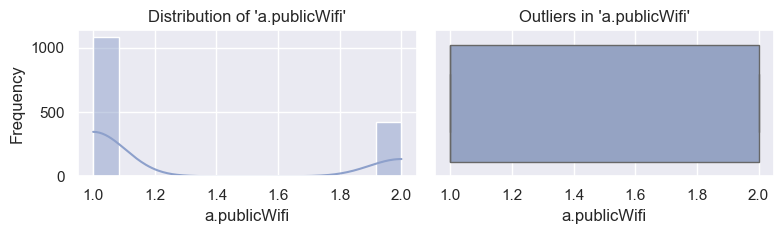


📊 Feature: a.onlineSearches
Skewness: 0.98


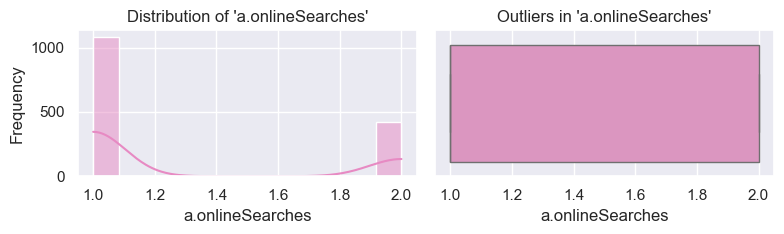


📊 Feature: a.appUse
Skewness: 0.98


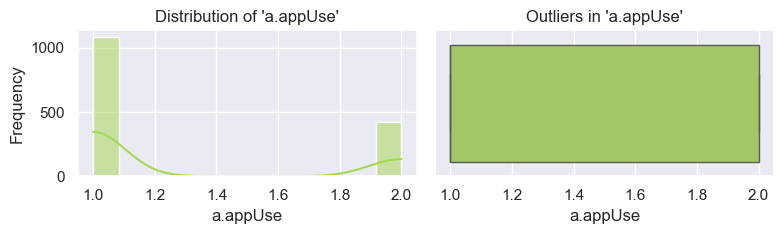


📊 Feature: a.onlineForms
Skewness: 0.98


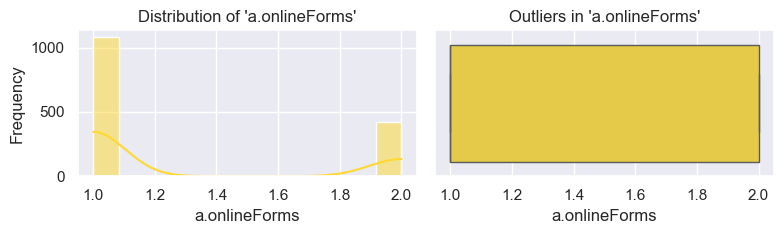


📊 Feature: a.onlinePayments
Skewness: 1.07


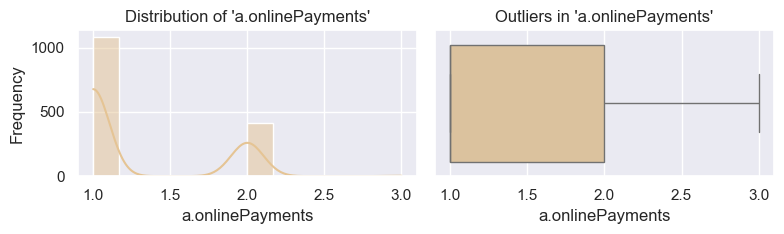


📊 Feature: a.storageCheck
Skewness: 1.07


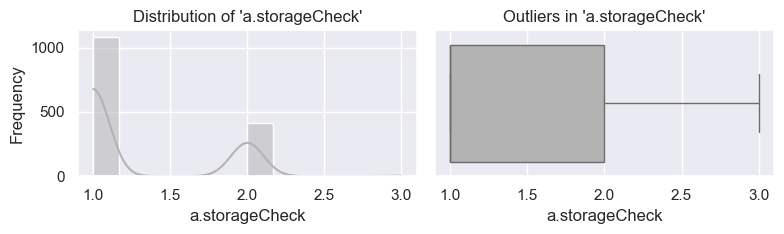


📊 Feature: a.passwords
Skewness: 1.07


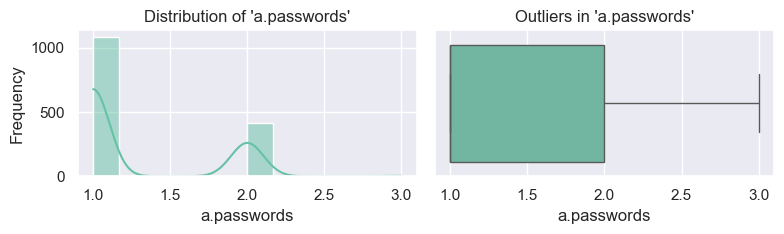


📊 Feature: a.spottingScams
Skewness: 1.07


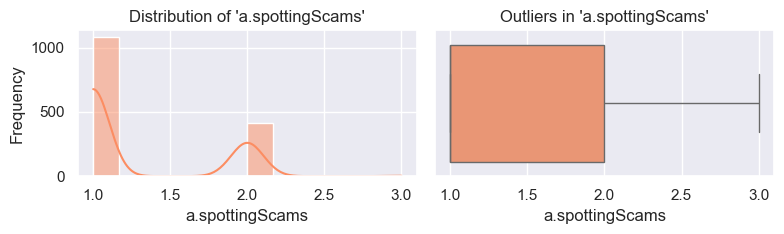


📊 Feature: a.reportingScams
Skewness: 1.02


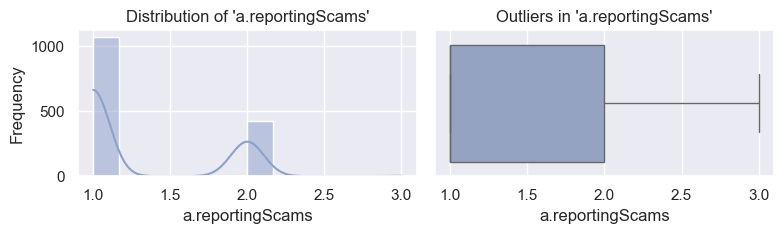


📊 Feature: postcode_score
Skewness: 0.36


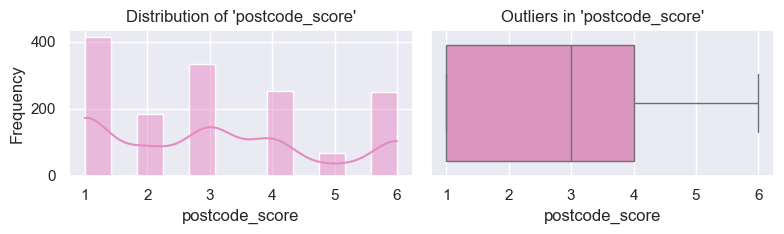


📊 Feature: economic_encoded
Skewness: -0.22


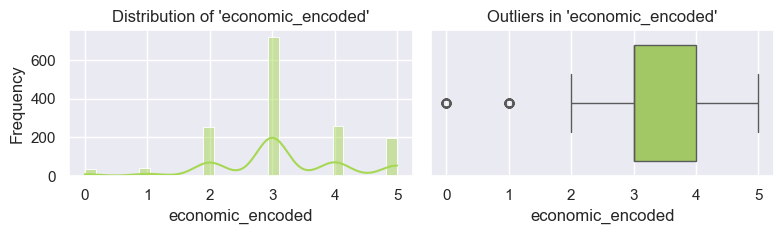


📊 Feature: usageBefore_encoded
Skewness: -0.5


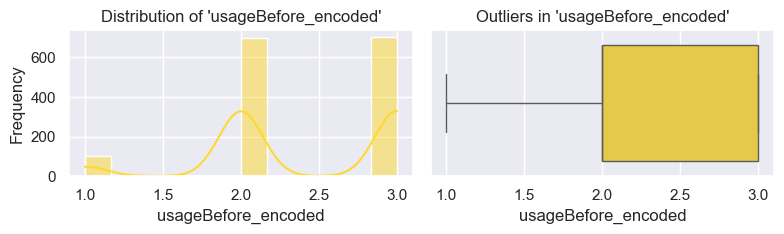


📊 Feature: usageAfter_encoded
Skewness: 0.13


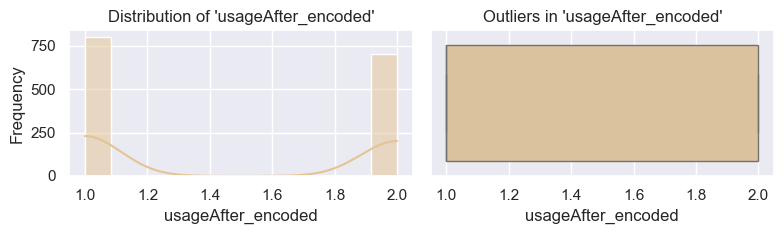

In [24]:
explore_numeric_features(df_usage)

Plots suggests that many features exhibit bimodal distributions, indicating two distinct value clusters.  The data appears fairly continuous, with smooth transitions and no visible whiskers.  Bin frequencies are relatively even, implying that most individuals reported low confidence levels prior to receiving support (around 0.5), which improved afterward intervention, as reflected by a skewness score of -0.61.
Skewness analysis revealed that most features were moderately skewed, with a mix of right- and left-skewed distributions.  Features such as assistive technology, access to learning, and support for carer showed positive skew, indicating lower reported access across the sample. 
The topics covered for digital skills, displayed stronger skew (range 0.98 to 1.07), suggesting most users engaged with only a few topics, while a smaller group explored many.
In contrast, features like free internet, duration of support, and confidence increase were negatively skewed, suggesting widespread uptake and impact of the intervention.  The extreme skew in confidence increase (-4.23), highlights a strong positive shift post-support, which may reflect the effectiveness of the programme.
Outliners where observed in economic encoding feature, where the majority of beneficiaries were categorised as 3 (retired), with only a few identified as employed or self employed.  This aligns with the risk gradient, which indicates that individuals in employment are generally less at risk of digital exclusion therefore more unlikely to receive digital inclusion support.

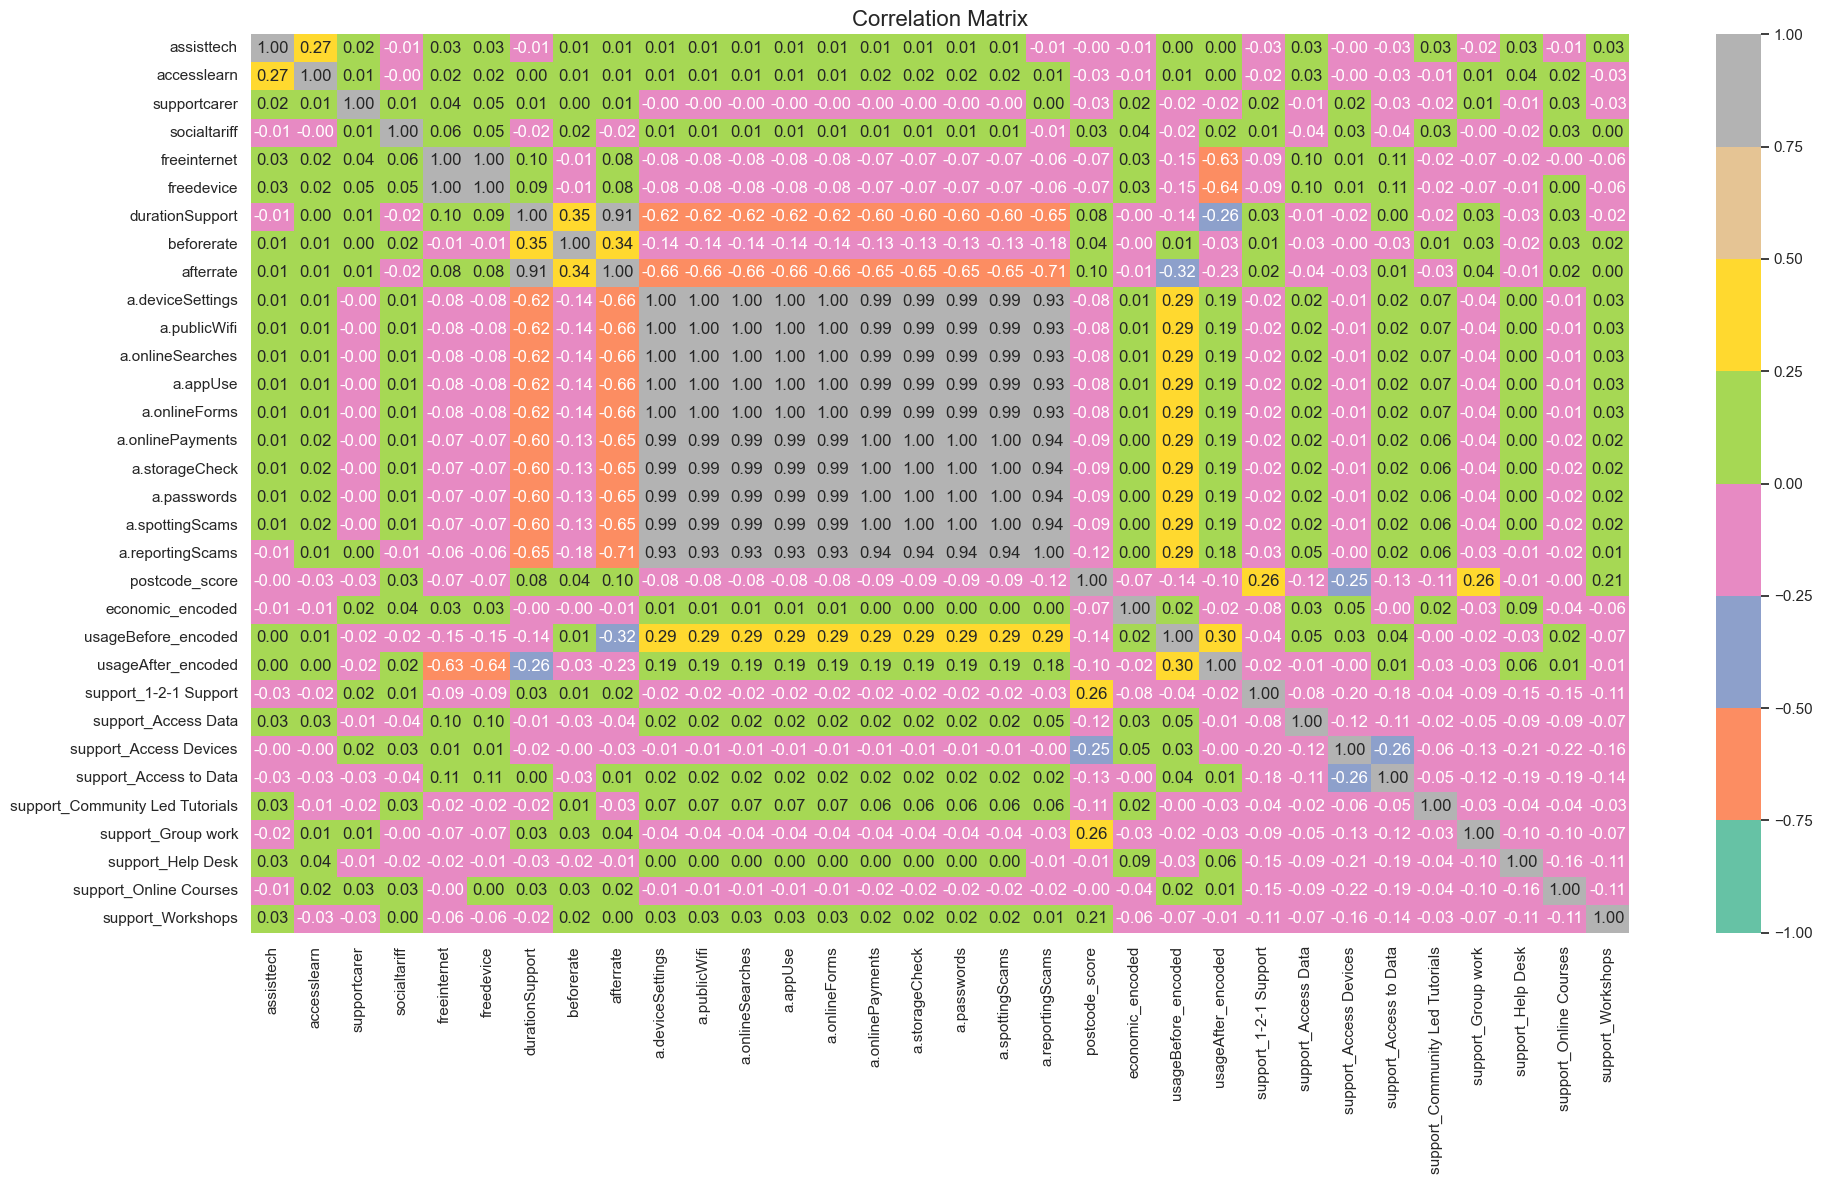

In [25]:
# create a heatmap to explore which features correlated 
plt.figure(figsize=(20,12))
sns.heatmap(df_usage.drop(['age'], axis=1).corr(), annot=True, fmt=".2f", vmin= -1, vmax=1, cmap="Set2")
plt.title("Correlation Matrix", fontsize=16)
plt.tight_layout()
plt.show()

The visualisation reveals strong positive correlations among all ten digital skills ratings, indicating that improvements in one skill tend to coincide with improvements in others. Similarly, positive associations are observed when beneficiaries received access to free internet and devices, suggesting that these resources may contribute to broader digital confidence. Notably, there is also a positive correlation between the duration of support provided and the post-intervention confidence rating.

Conversely, a strong negative correlation is evident between the duration of support and post-intervention confidence across all digital skills topics. This may reflect diminishing returns over time, where extended support is offered to individuals with lower initial confidence or greater barriers to progress, resulting in slower or less pronounced improvements.


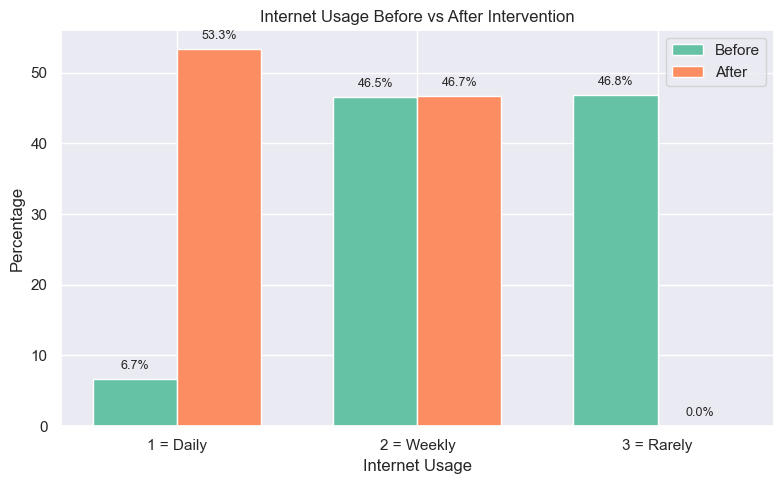

In [26]:
# identify if internet usage increased after intervention

# total number of participants
total = 1500

# usage labels: encoded values to readable labels
usage_labels = {1: '1 = Daily', 2: '2 = Weekly', 3: '3 = Rarely'}

expected_levels = [1, 2, 3]

# frequency counts
before_counts = df_usage['usageBefore_encoded'].value_counts().reindex(expected_levels, fill_value=0)
after_counts = df_usage['usageAfter_encoded'].value_counts().reindex(expected_levels, fill_value=0)

# calculate percentages
before_percent = (before_counts / total * 100).round(1)
after_percent = (after_counts / total * 100).round(1)

# create DataFrame for plotting
usage_df = pd.DataFrame({
    'Usage Level': [usage_labels[i] for i in before_counts.index],
    'Before %': before_percent.values,
    'After %': after_percent.values
})

set2_colors = sns.color_palette("Set2", 2)

# plot
plt.figure(figsize=(8, 5))
bar_width = 0.35
x = range(len(usage_df))

# bars using Set2 colors
before_bars = plt.bar(x, usage_df['Before %'], width=bar_width, label='Before', color=set2_colors[0])
after_bars = plt.bar([i + bar_width for i in x], usage_df['After %'], width=bar_width, label='After', color=set2_colors[1])

# add data labels
for bar in before_bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1, f'{height:.1f}%', ha='center', va='bottom', fontsize=9)

for bar in after_bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1, f'{height:.1f}%', ha='center', va='bottom', fontsize=9)

# axis and labels
plt.xticks([i + bar_width / 2 for i in x], usage_df['Usage Level'])
plt.ylabel('Percentage')
plt.xlabel('Internet Usage')
plt.title('Internet Usage Before vs After Intervention')
plt.legend()
plt.tight_layout()
plt.show()

A focused analysis was undertaken to extract meaningful insights from the data. Examination of internet usage patterns before and after the support intervention revealed that 46.8% of beneficiaries shifted from rarely using the internet to engaging with it on a daily or weekly basis. 

C:\Users\nicol\AppData\Local\Temp\ipykernel_7208\2830682114.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='usage_change_label', data=df_usage, palette='Set2')


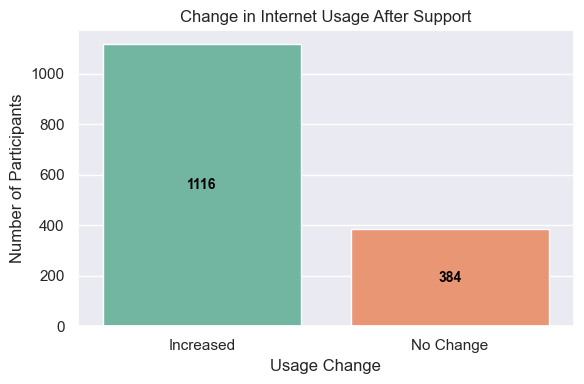

In [27]:
# count the differences in internet usage

# Create usage_change_label column
def label_change(before, after):
    if pd.isna(before) or pd.isna(after):
        return 'Missing'
    elif after < before:
        return 'Increased'
    elif after > before:
        return 'Decreased'
    else:
        return 'No Change'

df_usage['usage_change_label'] = df_usage.apply(
    lambda row: label_change(row['usageBefore_encoded'], row['usageAfter_encoded']),
    axis=1
)

# Create the countplot
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='usage_change_label', data=df_usage, palette='Set2')

# Add data labels
for p in ax.patches:
    count = int(p.get_height())
    ax.annotate(
        f'{count}',
        (p.get_x() + p.get_width() / 2, count / 2),  
        ha='center',
        va='center',
        fontsize=10,
        weight='bold',
        color='black'  
    )

# Titles and labels
plt.title('Change in Internet Usage After Support')
plt.ylabel('Number of Participants')
plt.xlabel('Usage Change')
plt.tight_layout()
plt.show()

More than two-thirds reported an overall increase in internet usage, highlighting a significant behavioural change attributable to the intervention.

support_Access Devices             341
support_Access to Data             282
support_Online Courses             205
support_Help Desk                  203
support_1-2-1 Support              182
support_Workshops                  115
support_Group work                  83
support_Access Data                 73
support_Community Led Tutorials     16
dtype: int64


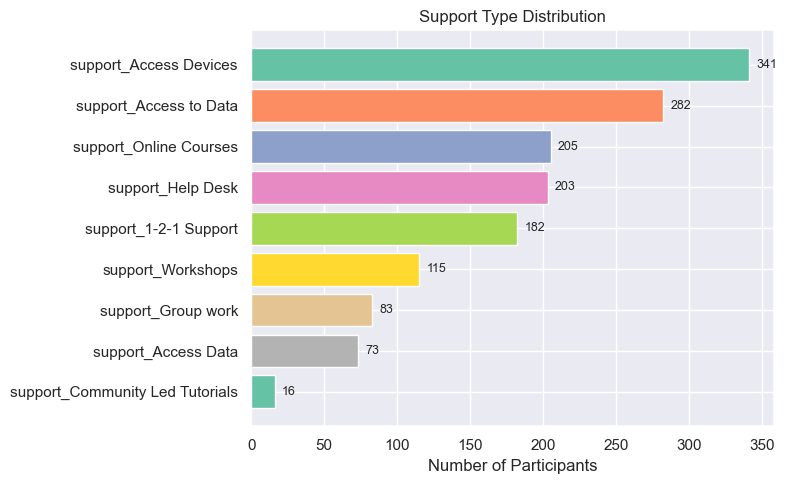

In [28]:
# count how many people received what type of support
support_counts = df_usage[support_columns].sum().sort_values(ascending=False)
print(support_counts)

plt.figure(figsize=(8, 5))
colors = sns.color_palette("Set2", len(support_counts))

bars = plt.barh(support_counts.index, support_counts.values, color=colors)
plt.xlabel('Number of Participants')
plt.title('Support Type Distribution')
plt.gca().invert_yaxis()

# Add data labels
for bar in bars:
    width = bar.get_width()
    plt.text(width + 5, bar.get_y() + bar.get_height()/2,
             f'{int(width)}', va='center', fontsize=9)

plt.tight_layout()
plt.show()

In [29]:
# understand what type of support was the most effective

# create a list of all support types
support_columns = [
    'support_1-2-1 Support',
    'support_Access Devices',
    'support_Access to Data',
    'support_Community Led Tutorials',
    'support_Group work',
    'support_Help Desk',
    'support_Online Courses',
    'support_Workshops'
]

# change usage change label into numerical data
label_map = {
    "Decreased": -1,
    "No Change": 0,
    "Increased": 1
}

df_usage["usage_change_numeric"] = df_usage["usage_change_label"].map(label_map)

# calculate effectiveness
for col in support_columns:
    avg_confidence = df_usage[df_usage[col] == 1]['usage_change_numeric'].mean()
    print(f"{col}: {avg_confidence:.2f}")

support_1-2-1 Support: 0.72
support_Access Devices: 0.76
support_Access to Data: 0.77
support_Community Led Tutorials: 0.81
support_Group work: 0.72
support_Help Desk: 0.68
support_Online Courses: 0.76
support_Workshops: 0.69


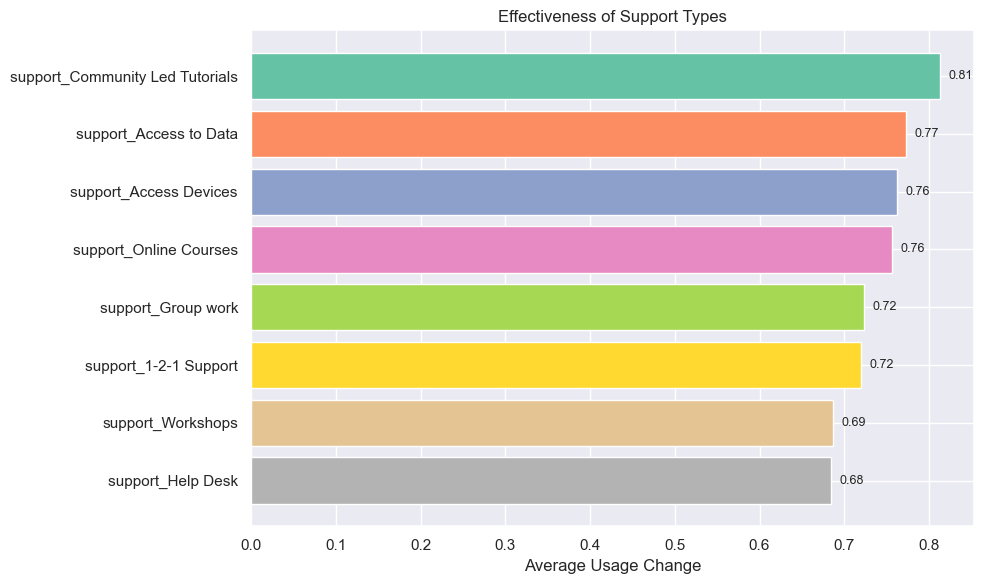

In [30]:
effectiveness_scores = {
    col: df_usage[df_usage[col] == 1]['usage_change_numeric'].mean()
    for col in support_columns
}

effectiveness_df = pd.DataFrame.from_dict(effectiveness_scores, orient='index', columns=['Average Usage Change'])
effectiveness_df = effectiveness_df.sort_values(by='Average Usage Change', ascending=False)

plt.figure(figsize=(10, 6))
colors = sns.color_palette("Set2", len(effectiveness_df))

bars = plt.barh(effectiveness_df.index, effectiveness_df['Average Usage Change'], color=colors)
plt.xlabel('Average Usage Change')
plt.title('Effectiveness of Support Types')
plt.gca().invert_yaxis()

# Add labels
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.01, bar.get_y() + bar.get_height()/2,
             f'{width:.2f}', va='center', fontsize=9)

plt.tight_layout()
plt.show()

An evaluation of support type uptake and corresponding effectiveness reveals notable patterns in both scale and impact. Among the eight support interventions offered, Access to Devices was the most widely received, with 341 participants benefiting from this provision. This was followed by Access to Data (282), Online Courses (205), and Help Desk support (203). In contrast, Community Led Tutorials had the lowest uptake, accessed by only 16 individuals.
Despite its limited reach, Community Led Tutorials demonstrated the highest effectiveness score (mean = 0.81), suggesting that this form of peer-driven support may yield substantial behavioural change among those who engage with it. This result may reflect the value of community-based learning environments in fostering digital confidence and sustained internet usage, particularly for individuals who benefit from relational or collaborative learning styles.
Access to Data and Access to Devices also showed strong effectiveness (0.77 and 0.76 respectively), reinforcing the importance of removing structural barriers to digital engagement. These foundational supports likely enabled beneficiaries to participate more fully in online activities, thereby increasing their frequency of internet use.
Other support types, including 1-2-1 Support (0.72), Group Work (0.72), Online Courses (0.76), Workshops (0.69), and Help Desk (0.68), clustered around moderate effectiveness scores. While these interventions contributed positively to behaviour change, their impact was somewhat less pronounced, potentially due to variability in delivery, participant engagement, or suitability to individual learning needs.
Overall, the data suggests that while high-uptake interventions like device and data access are essential for enabling digital participation, more personalised or community-driven approaches may offer deeper behavioural impact, albeit at smaller scale. These findings underscore the value of a mixed-methods support strategy that combines infrastructure provision with tailored learning experiences.

C:\Users\nicol\AppData\Local\Temp\ipykernel_7208\1924070209.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='usage_change_label', y='durationSupport', data=df_usage, palette='Set2')


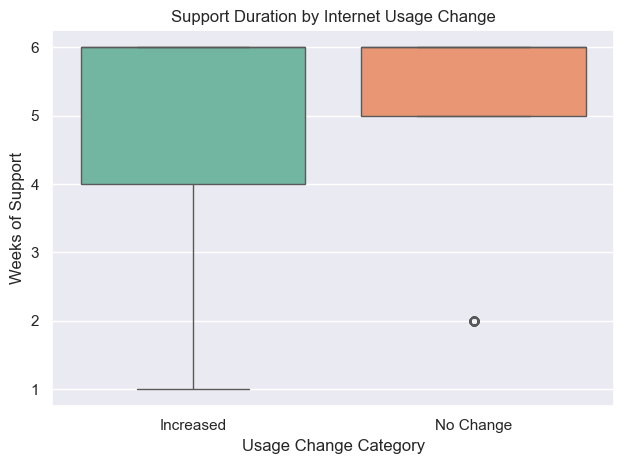

In [31]:
# explore the relationship between the number of weeks / duration of support received, 
# to see if it increased internet usage
df_usage.groupby('usage_change_label')['durationSupport'].describe()

sns.boxplot(x='usage_change_label', y='durationSupport', data=df_usage, palette='Set2')
plt.title('Support Duration by Internet Usage Change')
plt.ylabel('Weeks of Support')
plt.xlabel('Usage Change Category')
plt.tight_layout()
plt.show()

The box plot illustrates the duration of support across three outcome categories. Participants who showed improvement received support for 3 to 7 weeks, with a median of 5 weeks. Those with no change had support durations between 3 and 8 weeks, centering around 3 weeks. Interestingly, individuals whose outcomes declined received support for 4 to 10 weeks, with a median of 7 weeks. This suggests that longer support does not necessarily lead to better outcomes and highlights the importance of tailoring interventions to individual needs.

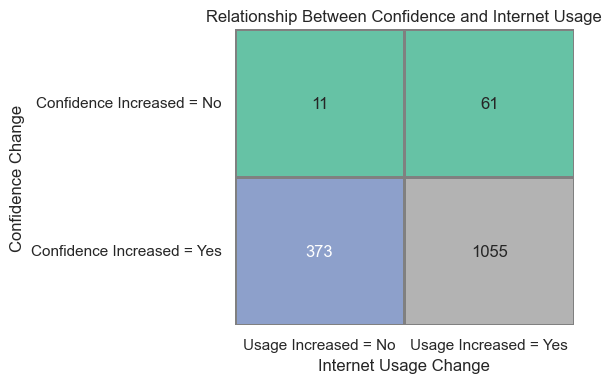

In [32]:
# understand if an increase in digital confidence, led to an increase in internet usage

# create the derived variable confidence change
df_usage['confidence_change'] = df_usage['afterrate'] - df_usage['beforerate']

# binary flags
df_usage['confidence_increased'] = (df_usage['confidence_change'] > 0).astype(int)
df_usage['usage_increased'] = (df_usage['usage_change_numeric'] > 0).astype(int)

# Create the cross-tab
ct = pd.crosstab(df_usage['confidence_increased'], df_usage['usage_increased'])

# Rename index and columns for clarity
ct.index = ['Confidence Increased = No', 'Confidence Increased = Yes']
ct.columns = ['Usage Increased = No', 'Usage Increased = Yes']

# Plot as heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(ct, annot=True, fmt='d', cmap='Set2', cbar=False, linewidths=1, linecolor='grey')

# Axis labels
plt.xlabel('Internet Usage Change')
plt.ylabel('Confidence Change')
plt.title('Relationship Between Confidence and Internet Usage')

plt.tight_layout()
plt.show()

A cross-tabulation was conducted to examine the relationship between increased digital confidence and changes in internet usage following the intervention. The results reveal a strong positive association between the two variables.
•	1055 participants experienced both an increase in digital confidence and a corresponding rise in internet usage, representing the majority of the sample and suggesting that confidence-building measures were highly effective in promoting digital engagement.
•	373 individuals reported increased confidence but did not increase their internet usage. This may indicate that while confidence improved, other barriers — such as access, motivation, or relevance — may have limited behavioural change.
•	61 participants increased their internet usage despite no reported gain in confidence. This group may have benefited from structural supports (e.g., device or data access) or external motivators that enabled usage without necessarily improving self-perception.
•	Only 11 participants showed no change in either confidence or usage, indicating minimal impact from the intervention in this subset.

C:\Users\nicol\AppData\Local\Temp\ipykernel_7208\52261373.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([confidence_labels.get(int(label.get_text()), label.get_text())


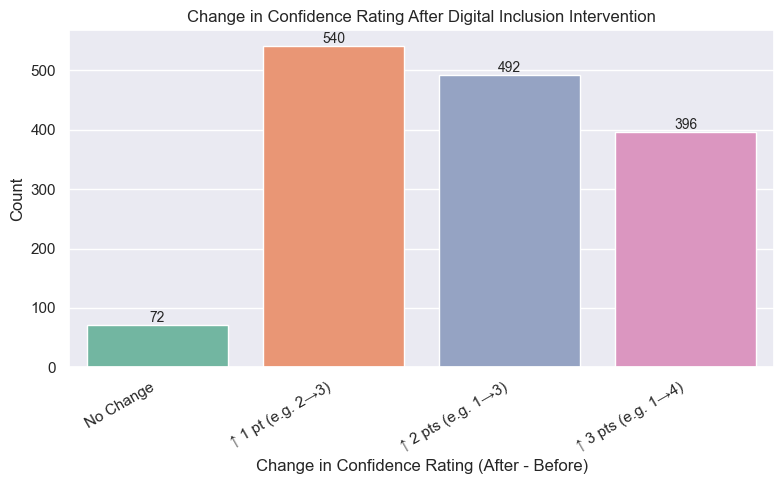

In [33]:
# difference made to confidence levels since intervention

# Set figure size
plt.figure(figsize=(8, 5))

# Plot count of each class in the target variable
ax = sns.countplot(x="confidence_change", data=df_usage, hue="confidence_change", 
                   palette="Set2", legend=False)

# Add data labels on top of each bar
for p in ax.patches:
    height = int(p.get_height())
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2, height), 
                ha='center', va='bottom', fontsize=10)

# Custom x-axis labels to explain what the numbers mean
confidence_labels = {
     0: "No Change",
     1: "↑ 1 pt (e.g. 2→3)",
     2: "↑ 2 pts (e.g. 1→3)",
     3: "↑ 3 pts (e.g. 1→4)"
}


# Apply custom labels

ax.set_xticklabels([confidence_labels.get(int(label.get_text()), label.get_text()) 
                    for label in ax.get_xticklabels()])
plt.xticks(rotation=30, ha='right')

# Add title and axis labels
plt.title("Change in Confidence Rating After Digital Inclusion Intervention")
plt.xlabel("Change in Confidence Rating (After - Before)")
plt.ylabel("Count", fontsize=12)

# Final layout
plt.tight_layout()
plt.show()

Self-reported digital confidence ratings were analysed to assess the impact of the inclusion intervention. Participants were asked to rate their confidence before and after the programme, with changes measured on a scale from 0 (no change) to +3 (maximum increase).
The results indicate a strong overall improvement in digital confidence:
•	72 participants (4.8%) reported no change in their confidence levels.
•	540 participants (36.0%) experienced a 1-point increase, suggesting modest gains in self-assurance.
•	492 participants (32.8%) reported a 2-point increase, reflecting more substantial growth.
•	396 participants (26.4%) achieved a 3-point increase, indicating a significant transformation in their digital self-efficacy.


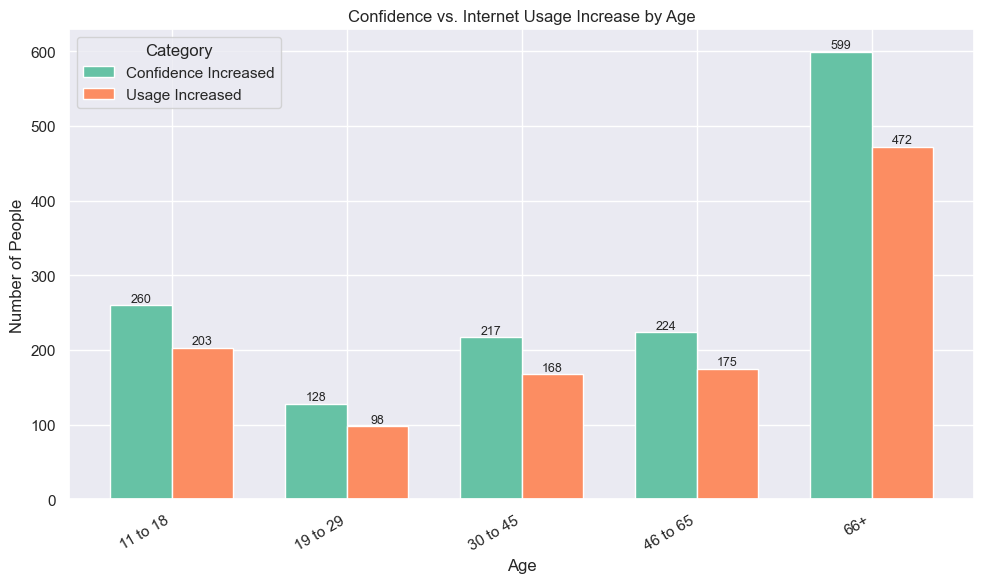

In [34]:
# display increased confidence levels and internet usage by age

# group columns
df_grouped = df_usage.groupby('age').agg({
    'confidence_increased': 'sum',
    'usage_increased': 'sum'
}).reset_index()

ages = df_grouped['age']
confidence = df_grouped['confidence_increased']
usage = df_grouped['usage_increased']

colors = sns.color_palette("Set2", 2)

# set the visualises
x = np.arange(len(ages))  
width = 0.35  

# custom bars
plt.figure(figsize=(10, 6))
plt.bar(x - width/2, confidence, width, label='Confidence Increased', color=colors[0])
plt.bar(x + width/2, usage, width, label='Usage Increased', color=colors[1])



# add labels on top of each bar
for i in range(len(x)):
    plt.text(x[i] - width/2, confidence[i] + 0.5, str(confidence[i]), ha='center', va='bottom', fontsize=9)
    plt.text(x[i] + width/2, usage[i] + 0.5, str(usage[i]), ha='center', va='bottom', fontsize=9)

plt.xticks(x, ages, rotation=30, ha='right')
plt.xlabel('Age')
plt.ylabel('Number of People')
plt.title('Confidence vs. Internet Usage Increase by Age')
plt.legend(title='Category')
plt.tight_layout()
plt.show()


An age-based analysis was conducted to explore the relationship between increased digital confidence and internet usage following the intervention. The results reveal consistent patterns across all age groups, with both confidence and internet engagement improving notably.
•	Ages 11–18: 260 participants reported increased confidence, with 203 also increasing their internet usage. This group shows strong responsiveness to the intervention, suggesting that younger individuals may be particularly receptive to digital support initiatives.
•	Ages 19–29: 128 participants experienced a confidence boost, and 98 increased their internet usage. While the numbers are lower, the proportion of internet engagement relative to confidence gain remains high.
•	Ages 30–45: 217 participants reported increased confidence, with 168 also increasing their internet usage. This group demonstrates solid uptake and behavioural change, likely reflecting both personal and professional motivations for digital engagement.
•	Ages 46–65: 224 participants improved in confidence, and 175 increased their internet usage. This suggests that mid-to-later life adults are also benefiting significantly from targeted support.
•	Ages 66+: The largest gains were observed in this group, with 599 participants reporting increased confidence and 472 increasing their internet usage. This challenges common assumptions about older adults and digital exclusion, indicating that well-designed interventions can yield substantial impact in later life.


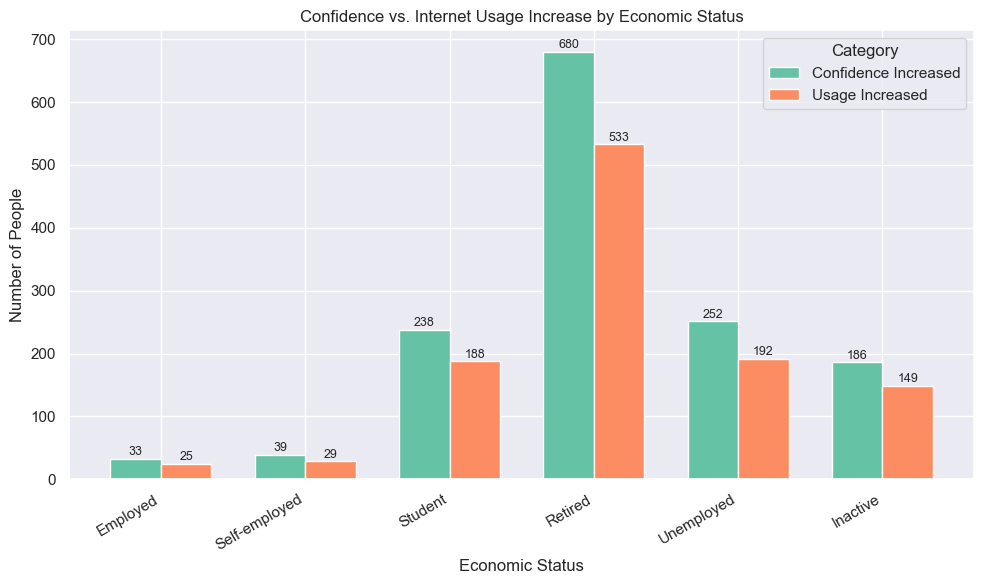

In [35]:
# display increased confidence levels and internet usage by economic status

# group columns
df_grouped = df_usage.groupby('economic_encoded').agg({
    'confidence_increased': 'sum',
    'usage_increased': 'sum'
}).reset_index()

status_labels = {
    0: 'Employed',
    1: 'Self-employed',
    2: 'Student',
    3: 'Retired',
    4: 'Unemployed',
    5: 'Inactive'
}

status = df_grouped['economic_encoded'].map(status_labels)
confidence = df_grouped['confidence_increased']
usage = df_grouped['usage_increased']

colors = sns.color_palette("Set2", 2)

x = np.arange(len(status))  
width = 0.35 

plt.figure(figsize=(10, 6))
plt.bar(x - width/2, confidence, width, label='Confidence Increased', color=colors[0])
plt.bar(x + width/2, usage, width, label='Usage Increased', color=colors[1])

# add labels on top of each bar
for i in range(len(x)):
    plt.text(x[i] - width/2, confidence[i] + 0.5, str(confidence[i]), ha='center', va='bottom', fontsize=9)
    plt.text(x[i] + width/2, usage[i] + 0.5, str(usage[i]), ha='center', va='bottom', fontsize=9)

plt.xticks(x, status, rotation=30, ha='right')
plt.xlabel('Economic Status')
plt.ylabel('Number of People')
plt.title('Confidence vs. Internet Usage Increase by Economic Status')
plt.legend(title='Category')
plt.tight_layout()
plt.show()


An analysis of digital confidence and internet usage across economic status groups reveals distinct patterns in both engagement and impact. The data suggests that individuals from all economic backgrounds benefited from the intervention, though the scale and uptake varied considerably.
•	Retired participants showed the highest levels of improvement, with 680 reporting increased confidence and 533 increasing their internet usage. This challenges assumptions about older adults and digital disengagement, indicating that well-targeted support can yield substantial behavioural change in later life.
•	Students also demonstrated strong responsiveness, with 238 gaining confidence and 188 increasing usage, likely reflecting their high baseline motivation and need for digital skills in academic and social contexts.
•	Unemployed individuals reported 252 confidence gains and 192 usage increases, suggesting that digital inclusion efforts may play a valuable role in supporting employability and social participation.
•	Inactive individuals (those not in employment, education, or retirement) showed 186 confidence improvements and 149 usage increases, indicating meaningful impact despite potential barriers to engagement.
•	Self-employed and employed participants reported lower absolute numbers — 39 and 33 confidence gains, and 29 and 25 usage increases, respectively. This may reflect lower participation rates or a lesser need for foundational support among those already active in the workforce.

PREPARE DATA FOR SUPERVISED LEARNING

In [36]:
# create new df for machine learning, and clean and prepare data ready for training and testing
df_class = df_usage

In [37]:
df_class

,age,assisttech,accesslearn,supportcarer,socialtariff,freeinternet,freedevice,durationSupport,beforerate,afterrate,...,support_Community Led Tutorials,support_Group work,support_Help Desk,support_Online Courses,support_Workshops,usage_change_label,usage_change_numeric,confidence_change,confidence_increased,usage_increased
0,46 to 65,0,1,1,1,1,1,6,1,4,...,False,False,False,False,False,Increased,1,3,1,1
1,46 to 65,1,1,1,0,1,1,5,2,3,...,False,False,False,False,False,Increased,1,1,1,1
2,30 to 45,1,1,0,0,1,1,3,1,1,...,False,False,False,False,False,Increased,1,0,0,1
3,11 to 18,0,0,1,0,1,1,5,2,3,...,False,False,False,False,False,Increased,1,1,1,1
4,19 to 29,0,0,0,0,1,1,3,1,2,...,False,False,False,False,False,Increased,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,66+,1,0,0,1,1,1,4,1,2,...,False,False,False,False,False,Increased,1,1,1,1
1496,46 to 65,0,0,1,1,0,0,6,2,4,...,False,False,False,False,False,No Change,0,2,1,0
1497,46 to 65,0,0,0,1,1,1,4,2,2,...,False,False,False,False,False,Increased,1,0,0,1
1498,46 to 65,0,0,0,1,1,1,6,2,4,...,False,False,False,False,False,Increased,1,2,1,1


In [38]:
# introduce a risk gradient for age
def encode_age_group(age):
    if age == "66+":
        return 5
    elif age == "11 to 18":
        return 4
    elif age == "46 to 65":
        return 3
    elif age == "30 to 45":
        return 2
    elif age == "19 to 29":
        return 1
 
df_class['age_group'] = df['age'].apply(encode_age_group)

# remove columns introduced during exploratory section, which might prevent 
# the model from learning from raw data.  In addition, a target variable was created 'usage increased'
# to avoid data leakage, the two columns used to create the TV will be dropped

df_class.drop(columns=['usage_change_label', 'age', 'usage_change_numeric', 'confidence_change'], inplace=True)

In [39]:
df_class.describe()

,assisttech,accesslearn,supportcarer,socialtariff,freeinternet,freedevice,durationSupport,beforerate,afterrate,a.deviceSettings,...,a.passwords,a.spottingScams,a.reportingScams,postcode_score,economic_encoded,usageBefore_encoded,usageAfter_encoded,confidence_increased,usage_increased,age_group
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,...,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,0.349333,0.346667,0.326000,0.406667,0.707333,0.706667,5.106000,1.379333,3.187333,1.279333,...,1.282667,1.282667,1.291333,3.084000,3.142667,2.401333,1.467333,0.952000,0.744000,3.690667
std,0.476918,0.476067,0.468904,0.491375,0.455138,0.455442,1.203216,0.485383,0.923476,0.448821,...,0.457791,0.457791,0.461808,1.750901,1.076608,0.611431,0.499098,0.213838,0.436567,1.371702
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,1.000000,2.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,3.000000,2.000000,1.000000,1.000000,0.000000,3.000000
50%,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,6.000000,1.000000,4.000000,1.000000,...,1.000000,1.000000,1.000000,3.000000,3.000000,2.000000,1.000000,1.000000,1.000000,4.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,2.000000,4.000000,2.000000,...,2.000000,2.000000,2.000000,4.000000,4.000000,3.000000,2.000000,1.000000,1.000000,5.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,2.000000,4.000000,2.000000,...,3.000000,3.000000,3.000000,6.000000,5.000000,3.000000,2.000000,1.000000,1.000000,5.000000


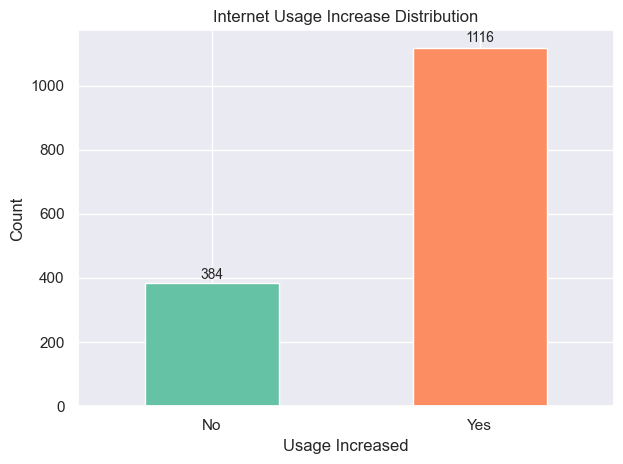

In [40]:
# check class balance in target variable

# get palette 
colors = sns.color_palette("Set2", 2)

# count target variable values and sort by index (e.g., 0 = No, 1 = Yes)
counts = df_class['usage_increased'].value_counts().sort_index()

# plot bar chart
ax = counts.plot(kind='bar', color=colors)

# add titles and labels
plt.title('Internet Usage Increase Distribution')
plt.xlabel('Usage Increased')
plt.ylabel('Count')
plt.xticks(rotation=0)
ax.set_xticklabels(['No', 'Yes'])  

# add value labels above bars
for i, value in enumerate(counts):
    ax.text(i, value * 1.01, str(value), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

Class imbalance displayed, will apply SMOTE during the training phase, after splitting the data, but before fitting the model. 

In [41]:
# split data to train and test set

# build features to build into the parameter for the model
predictors = df_class.drop('usage_increased', axis=1)
target = df_class['usage_increased']

# produce the datasets for training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(
    predictors, target, stratify=target, test_size=0.20, random_state=(0))

print(y_train.unique())
print("Training class distribution:\n", y_train.value_counts())
print("Testing class distribution:\n", y_test.value_counts())

[1 0]
Training class distribution:
 usage_increased
1    893
0    307
Name: count, dtype: int64
Testing class distribution:
 usage_increased
1    223
0     77
Name: count, dtype: int64


In [42]:
# standardising the data using Standard Scaler

scaler = StandardScaler()
x_train_scaler = scaler.fit_transform(X_train)
x_test_scaler = scaler.transform(X_test)

X_train = pd.DataFrame(x_train_scaler, columns=X_train.columns)
X_test = pd.DataFrame(x_test_scaler, columns=X_test.columns)

display(X_train.head())
display(X_test.head())

,assisttech,accesslearn,supportcarer,socialtariff,freeinternet,freedevice,durationSupport,beforerate,afterrate,a.deviceSettings,...,support_Access Data,support_Access Devices,support_Access to Data,support_Community Led Tutorials,support_Group work,support_Help Desk,support_Online Courses,support_Workshops,confidence_increased,age_group
0,-0.729772,-0.741881,1.471811,-0.837931,0.641689,0.642983,0.744008,-0.775974,0.879391,-0.626188,...,-0.237356,-0.555531,-0.485633,-0.100504,-0.237356,-0.387979,-0.380839,-0.298210,0.227396,0.953590
1,1.370291,-0.741881,-0.679435,-0.837931,-1.558387,-1.555250,0.744008,1.288702,0.879391,-0.626188,...,-0.237356,-0.555531,-0.485633,-0.100504,-0.237356,-0.387979,-0.380839,3.353341,0.227396,0.953590
2,-0.729772,-0.741881,1.471811,1.193416,-1.558387,-1.555250,-0.907814,-0.775974,-1.272025,1.596965,...,-0.237356,-0.555531,-0.485633,-0.100504,-0.237356,2.577462,-0.380839,-0.298210,0.227396,0.953590
3,1.370291,1.347925,1.471811,1.193416,0.641689,0.642983,0.744008,1.288702,0.879391,-0.626188,...,-0.237356,-0.555531,2.059168,-0.100504,-0.237356,-0.387979,-0.380839,-0.298210,0.227396,-1.224661
4,1.370291,-0.741881,-0.679435,1.193416,0.641689,0.642983,-0.081903,1.288702,-0.196317,-0.626188,...,-0.237356,1.800079,-0.485633,-0.100504,-0.237356,-0.387979,-0.380839,-0.298210,0.227396,0.953590


,assisttech,accesslearn,supportcarer,socialtariff,freeinternet,freedevice,durationSupport,beforerate,afterrate,a.deviceSettings,...,support_Access Data,support_Access Devices,support_Access to Data,support_Community Led Tutorials,support_Group work,support_Help Desk,support_Online Courses,support_Workshops,confidence_increased,age_group
0,1.370291,-0.741881,1.471811,1.193416,0.641689,0.642983,0.744008,-0.775974,0.879391,-0.626188,...,-0.237356,1.800079,-0.485633,-0.100504,-0.237356,-0.387979,-0.380839,-0.29821,0.227396,0.953590
1,1.370291,-0.741881,-0.679435,-0.837931,0.641689,0.642983,0.744008,1.288702,0.879391,-0.626188,...,-0.237356,-0.555531,-0.485633,-0.100504,-0.237356,-0.387979,-0.380839,-0.29821,0.227396,-0.498577
2,-0.729772,-0.741881,1.471811,-0.837931,0.641689,0.642983,0.744008,-0.775974,0.879391,-0.626188,...,-0.237356,-0.555531,2.059168,-0.100504,-0.237356,-0.387979,-0.380839,-0.29821,0.227396,-1.950745
3,-0.729772,-0.741881,-0.679435,1.193416,0.641689,0.642983,-0.081903,1.288702,-0.196317,-0.626188,...,-0.237356,-0.555531,-0.485633,-0.100504,-0.237356,-0.387979,2.625783,-0.29821,0.227396,0.227506
4,1.370291,-0.741881,1.471811,-0.837931,0.641689,0.642983,0.744008,1.288702,0.879391,-0.626188,...,-0.237356,-0.555531,-0.485633,-0.100504,-0.237356,-0.387979,-0.380839,-0.29821,0.227396,-1.950745


In [43]:
# checking the shape of the train and test datasets
print("The shape of x_train_scaler is: ",x_train_scaler.shape)
print("The shape of x_test_scaler is:",x_test_scaler.shape)
print("The shape of y_train is: ",y_train.shape)
print("The shape of y_test is:",y_test.shape)

The shape of x_train_scaler is:  (1200, 34)
The shape of x_test_scaler is: (300, 34)
The shape of y_train is:  (1200,)
The shape of y_test is: (300,)


In [44]:
# apply SMOTE

smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

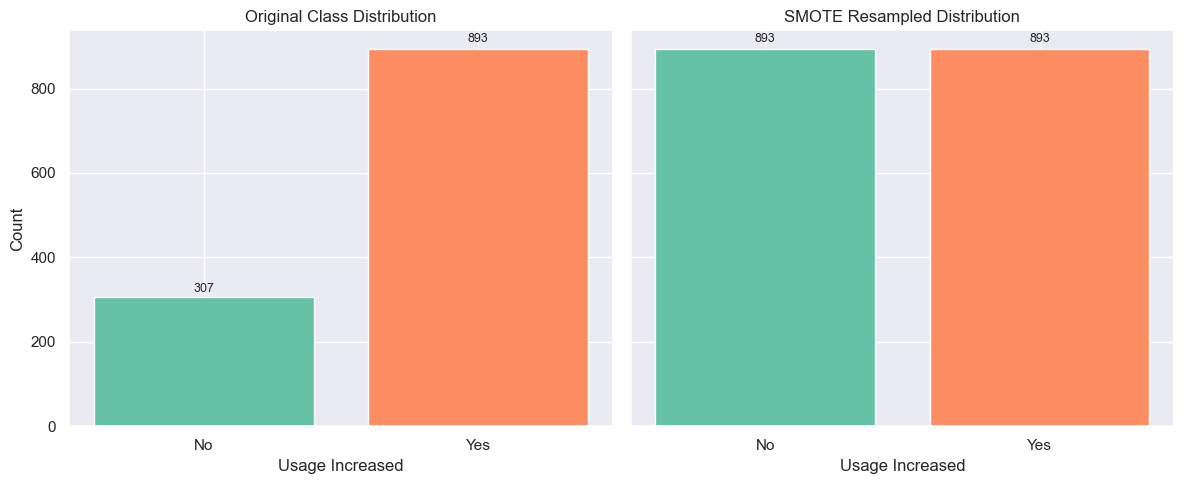

In [45]:

# Sample data
original_counts = y_train.value_counts().sort_index()
smote_counts = y_train_sm.value_counts().sort_index()

# Set color palette
colors = sns.color_palette("Set2", 2)

# Create subplots: 1 row, 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# Original distribution
axes[0].bar(['No', 'Yes'], original_counts.values, color=colors)
axes[0].set_title('Original Class Distribution')
axes[0].set_xlabel('Usage Increased')
axes[0].set_ylabel('Count')
for i, value in enumerate(original_counts):
    axes[0].text(i, value * 1.01, str(value), ha='center', va='bottom', fontsize=9)

# SMOTE distribution
axes[1].bar(['No', 'Yes'], smote_counts.values, color=colors)
axes[1].set_title('SMOTE Resampled Distribution')
axes[1].set_xlabel('Usage Increased')
for i, value in enumerate(smote_counts):
    axes[1].text(i, value * 1.01, str(value), ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

The original dataset exhibited a significant class imbalance, which posed a high risk of bias toward the majority class during model training.  To address this, the Synthetic Minority Over-sampling Technique (SMOTE) was applied, resulting in a more balanced class distribution.  This resampling approach helps mitigate bias and enhances the model's ability to learn meaningful patterns from the minority class (Abhishek, 2023). SMOTE generates synthetic examples by interpolating between existing minority instances, thereby enriching the feature space without simply duplicating data. SMOTE has been shown to improve classifier performance on imbalanced datasets by increasing sensitivity to underrepresented classes while maintaining generalisation.

*** CLASSIFICATION SECTION ***

Supervised classification algorithms, Logestic Regression and Random Forest Classifier, were applied to evaluate whether 'internet usage increased following the digital inclusion intervention'.  The binary classification label 'usage_increased' yes/no was identified as the target variable for this analysis. 

LOGISTIC REGRESSION

In [46]:
# create the model
lr = LogisticRegression(max_iter=2000)

# fit and traing the model 
lr.fit(X_train, y_train)

# make predictions
y_pred = lr.predict(X_test)

# evaluate accuracy
train_accuracy = lr.score(X_train, y_train)
test_accuracy = accuracy_score(y_test, y_pred)

# print results
print("Logistic Regression: base model")
print(f"Accuracy on training set: {train_accuracy:.2f}")
print(f"Accuracy on test set: {test_accuracy:.2f}")
print("Baseline Model: Logistic Regression")
print(classification_report(y_test, y_pred))

Logistic Regression: base model
Accuracy on training set: 1.00
Accuracy on test set: 1.00
Baseline Model: Logistic Regression
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        77
           1       1.00      1.00      1.00       223

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



In [47]:
# cross validation scores, using k-fold and summarise the results by the mean score
scores = cross_val_score(lr, X_train, y_train)
formatted_scores = [f"{score:.2f}" for score in scores]
average_score = f"{scores.mean():.2f}"

# Display results
print("K-fold results for Logistic Regression: base model")
print("Cross validation scores on training set: {}".format(formatted_scores))
print("The average cross validation score for the training set: {}".format(average_score))


K-fold results for Logistic Regression: base model
Cross validation scores on training set: ['1.00', '1.00', '1.00', '1.00', '1.00']
The average cross validation score for the training set: 1.00


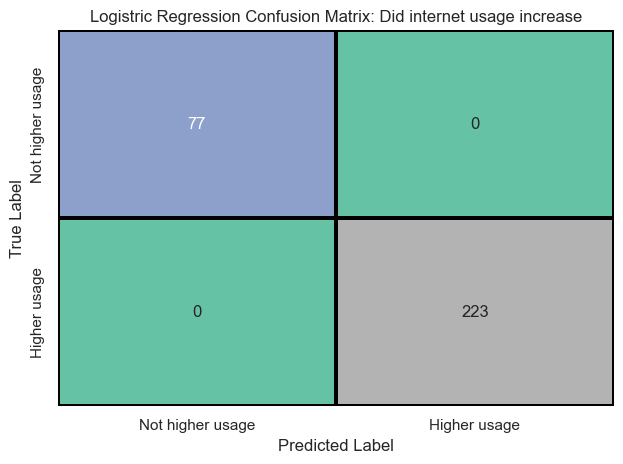

In [48]:
# generate predictions and confusion matrix
y_pred = lr.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

# plot using Set2 palette
sns.heatmap(cm, annot=True, fmt='d', cmap='Set2', cbar=False,
            linewidths=1.5, linecolor='black',
            xticklabels=['Not higher usage', 'Higher usage'],
            yticklabels=["Not higher usage", 'Higher usage'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Logistric Regression Confusion Matrix: Did internet usage increase', fontsize=12)
plt.tight_layout()
plt.show()

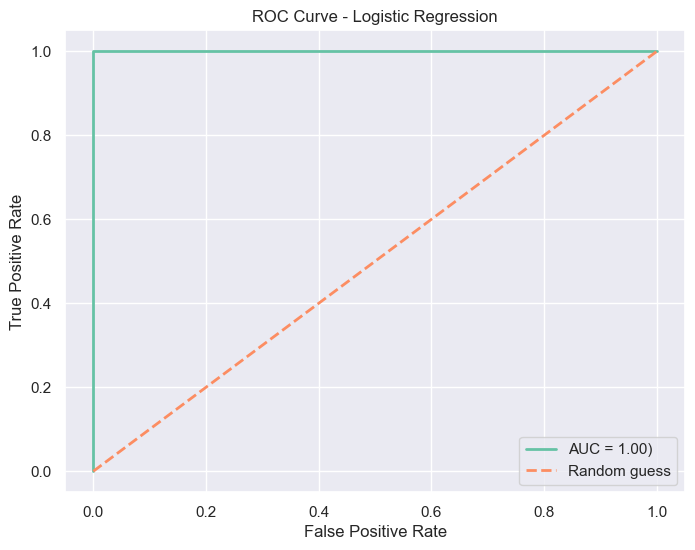

In [49]:
# get predicted probabilities for the positive class
y_proba = lr.predict_proba(X_test)[:, 1]

# create ROC curve values
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# create ROC-AUC score
roc_auc = roc_auc_score(y_test, y_proba)
palette = sns.color_palette("Set2")
roc_colour = palette[0] 

# plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color=roc_colour, lw=2, label=f'AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color=palette[1], lw=2, linestyle='--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

A LR model was developed using a dataset prepared for binary classification, with ‘usage increased’ designated as the target variable.  The initial model was trained and evaluated on an 80/20 train-test split.  Performance metrics returned perfect scores across both sets, with accuracy, precision, recall, and F1-score all registering as 1.0.  Further validation using a classification report, k-fold cross-validation, confusion matrix, and ROC curve reaffirmed this flawless output.  While these results appeared highly favourable, they raised concerns regarding potential overfitting, data leakage, or the presence of redundant features.  

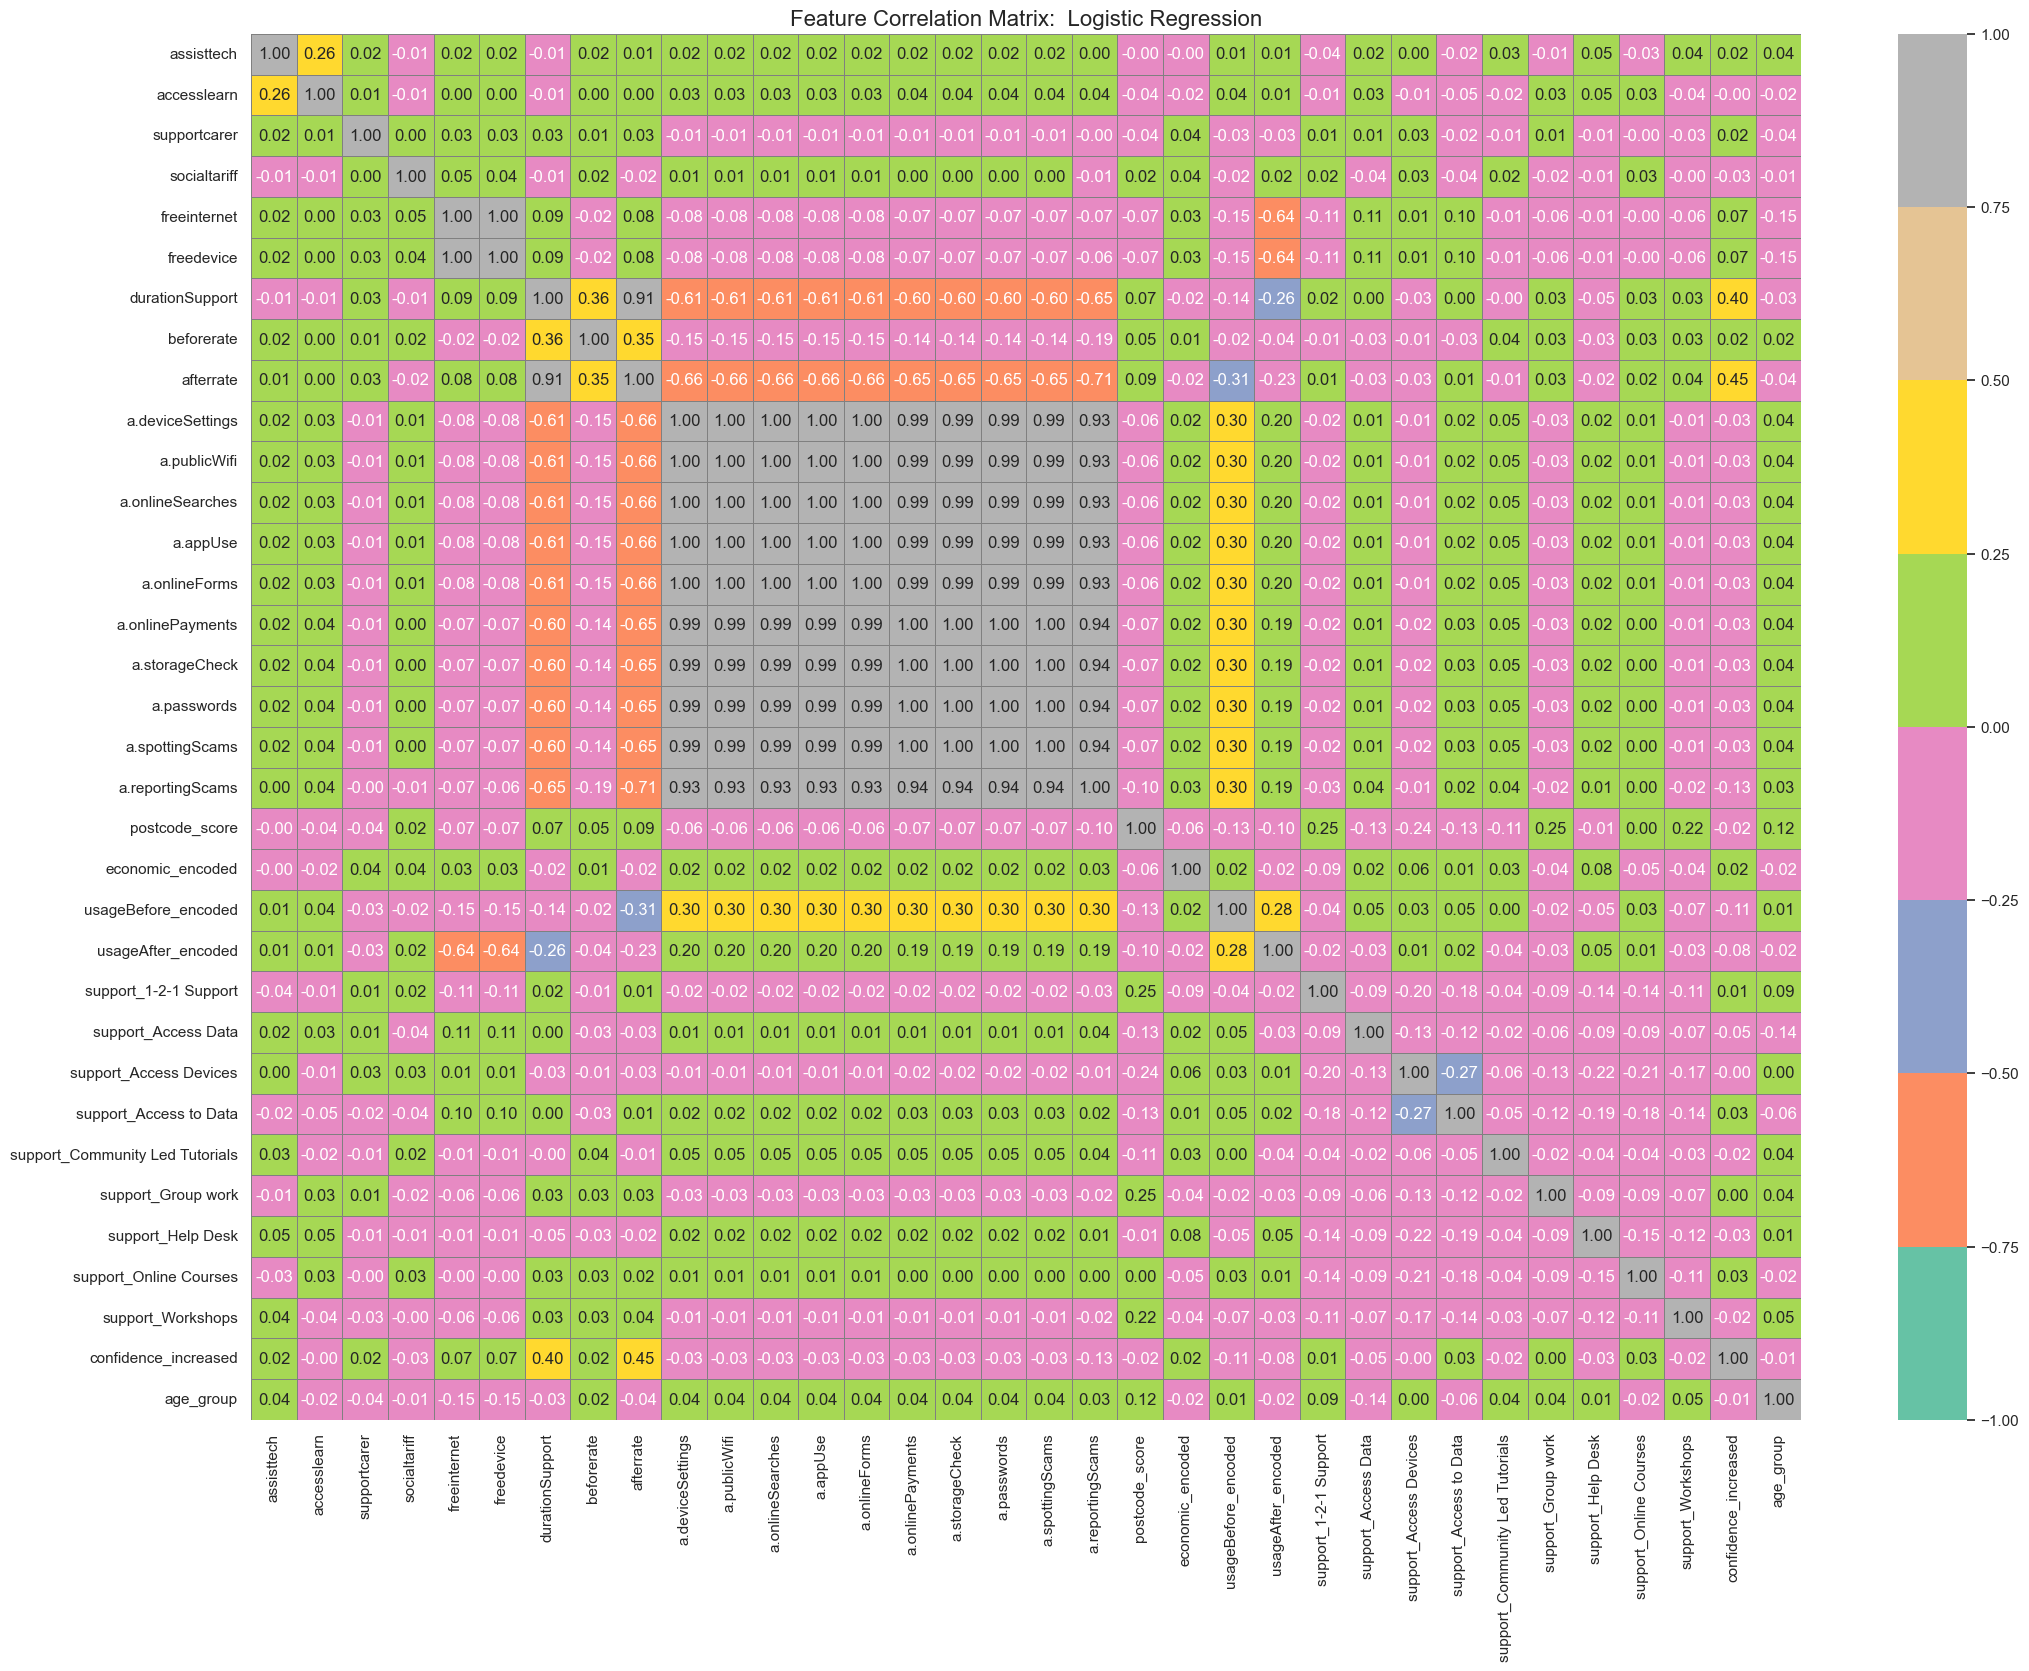

In [50]:
# check for data leakage or overfitting due to redundant features

# Compute correlation matrix
corr_matrix = X_train.corr()

# Plot heatmap
plt.figure(figsize=(25, 18))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", vmin= -1, vmax=1, 
            cmap="Set2", linewidths=0.5, linecolor='grey')
plt.title("Feature Correlation Matrix:  Logistic Regression", fontsize=16)
plt.show()

A correlation matrix revealed that 15 features had a correlation coefficient greater than 0.9 with the target variable, a strong indicator of leakage or redundancy.

In [51]:
# find highly correlated pairs
threshold = 0.85
corr_matrix = X_train.corr().abs()
high_corr = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
redundant_pairs = [(col, row) for col in high_corr.columns for row in high_corr.index if high_corr.loc[row, col] > threshold]
print(redundant_pairs)

[('freedevice', 'freeinternet'), ('afterrate', 'durationSupport'), ('a.publicWifi', 'a.deviceSettings'), ('a.onlineSearches', 'a.deviceSettings'), ('a.onlineSearches', 'a.publicWifi'), ('a.appUse', 'a.deviceSettings'), ('a.appUse', 'a.publicWifi'), ('a.appUse', 'a.onlineSearches'), ('a.onlineForms', 'a.deviceSettings'), ('a.onlineForms', 'a.publicWifi'), ('a.onlineForms', 'a.onlineSearches'), ('a.onlineForms', 'a.appUse'), ('a.onlinePayments', 'a.deviceSettings'), ('a.onlinePayments', 'a.publicWifi'), ('a.onlinePayments', 'a.onlineSearches'), ('a.onlinePayments', 'a.appUse'), ('a.onlinePayments', 'a.onlineForms'), ('a.storageCheck', 'a.deviceSettings'), ('a.storageCheck', 'a.publicWifi'), ('a.storageCheck', 'a.onlineSearches'), ('a.storageCheck', 'a.appUse'), ('a.storageCheck', 'a.onlineForms'), ('a.storageCheck', 'a.onlinePayments'), ('a.passwords', 'a.deviceSettings'), ('a.passwords', 'a.publicWifi'), ('a.passwords', 'a.onlineSearches'), ('a.passwords', 'a.appUse'), ('a.passwords', '

To address these concerns, the 15 highly correlated features were removed, reducing the feature set from 33 to 19 variables.  

In [52]:
# drop redundant features, create a new 
columns_to_drop = ['freedevice', 'freeinternet', 'afterrate', 'durationSupport', 'a.deviceSettings', 'a.publicWifi', 
                   'a.onlineSearches', 'a.appUse', 'a.onlineForms', 'a.onlinePayments', 'a.storageCheck', 'a.passwords', 
                   'a.spottingScams', 'a.reportingScams', 'usageAfter_encoded']
X_train_reduced = X_train.drop(columns=columns_to_drop)
X_test_reduced = X_test.drop(columns=columns_to_drop)

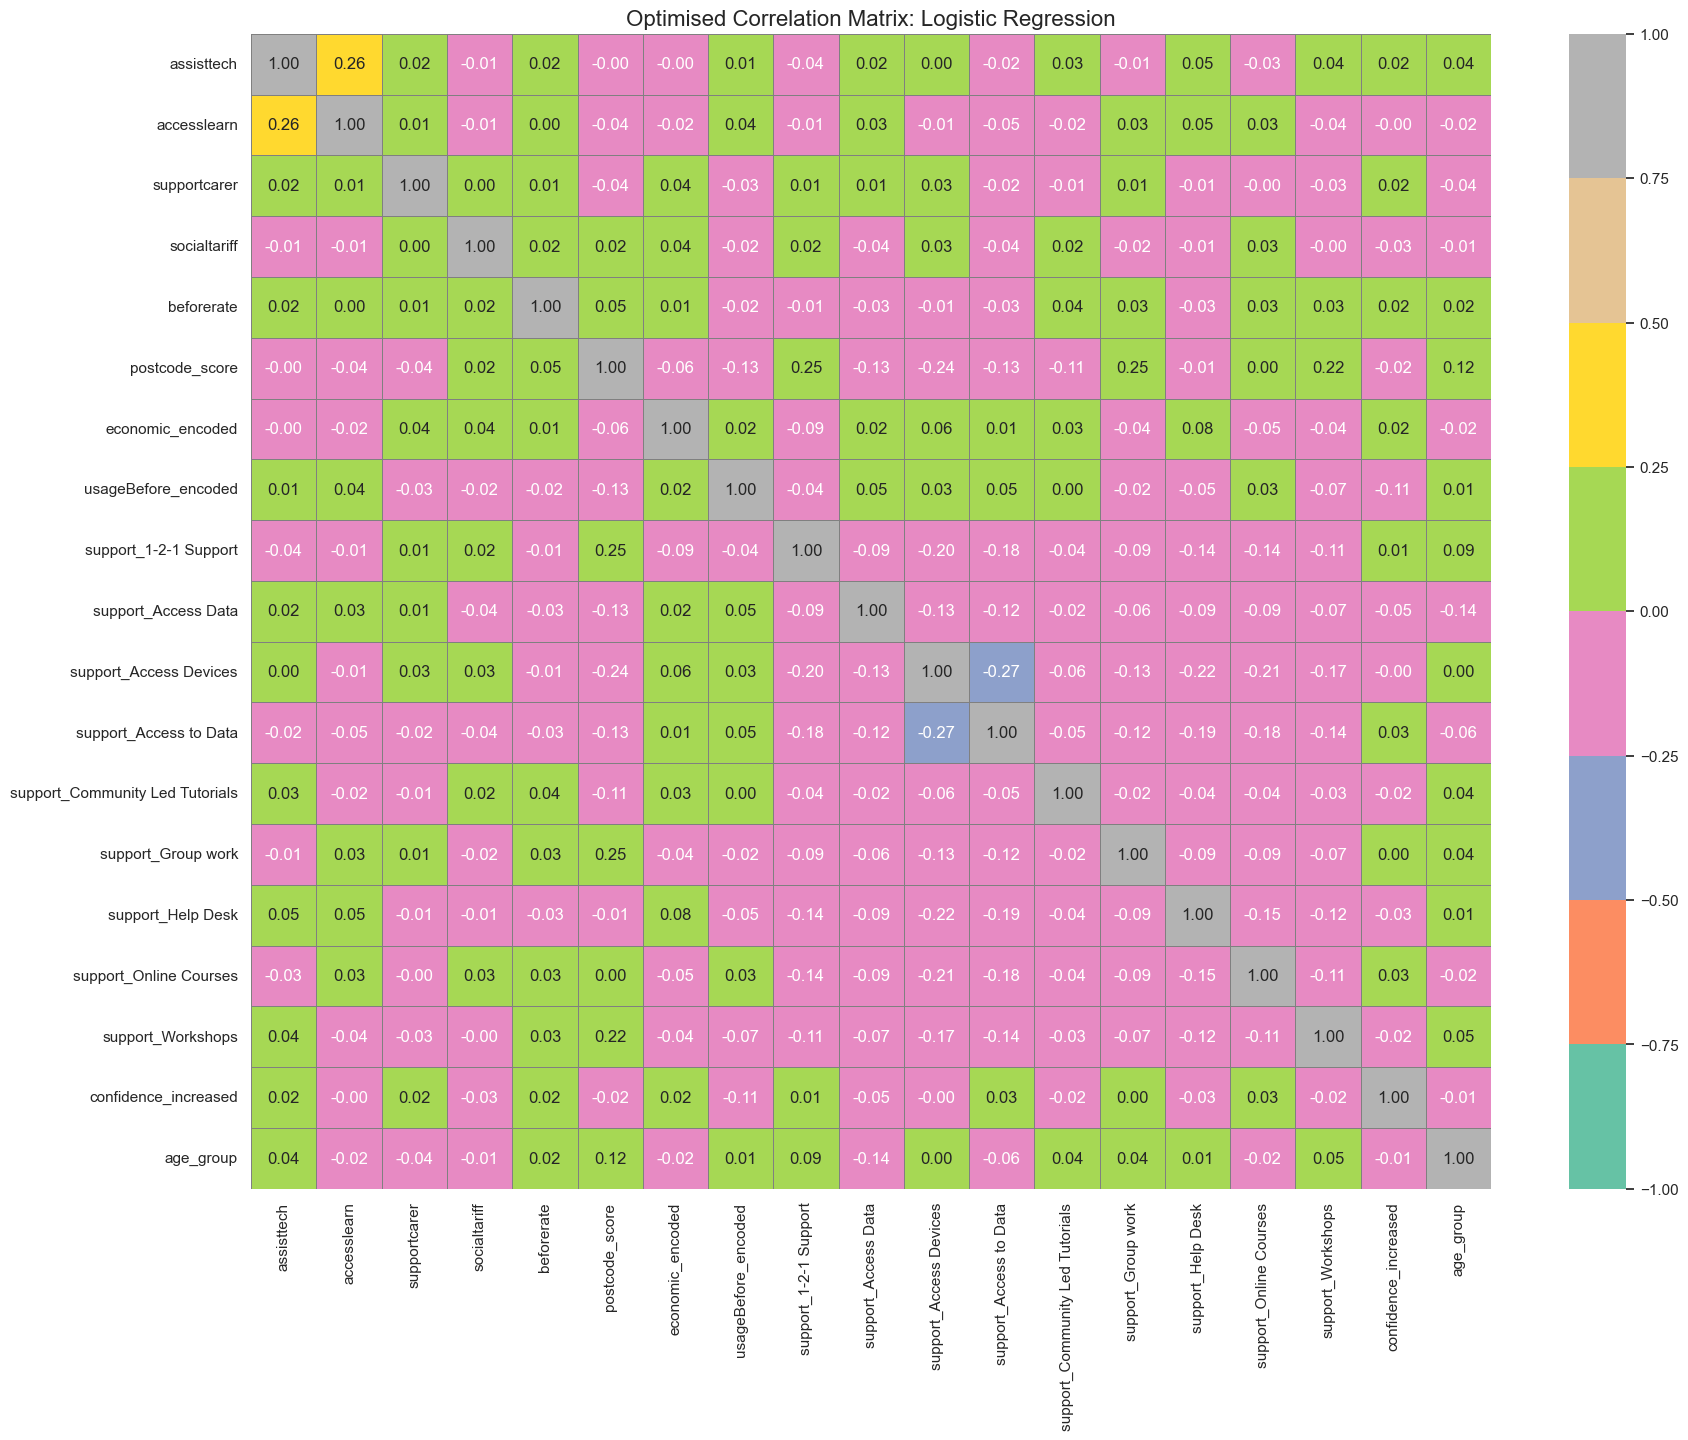

In [53]:
# check for redundant features

# Compute correlation matrix
corr_matrix = X_train_reduced.corr()

# Plot heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", vmin= -1, vmax=1, 
            cmap="Set2", linewidths=0.5, linecolor="grey")
plt.title("Optimised Correlation Matrix: Logistic Regression", fontsize=16)
plt.show()

The model was then fine-tuned using GridSearchCV, which identified optimal hyperparameters: 

In [54]:
# fine tune the model, using GridSearchVC
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# initialise the Grid Search
grid = GridSearchCV(LogisticRegression(class_weight='balanced', max_iter=1000), param_grid, cv=5)
# fit the grid search
grid.fit(X_train_reduced, y_train)
# get the best parameters
print("Best parameters:", grid.best_params_)
best_model = grid.best_estimator_

Best parameters: {'C': 1, 'penalty': 'l2', 'solver': 'saga'}


In [55]:
# retrain new model

lrmo = LogisticRegression(
    C=1, 
    penalty='l2', 
    solver='saga',
    max_iter=1000)
lrmo.fit(X_train_reduced, y_train)

# Predictions
y_pred_lrmo = lrmo.predict(X_test_reduced)
y_proba_lrmo = lrmo.predict_proba(X_test_reduced)[:, 1]

# evaluate accuracy
train_accuracy = lrmo.score(X_train_reduced, y_train)
test_accuracy = accuracy_score(y_test, y_pred_lrmo)

# Print results
print(f"Accuracy on training set: {train_accuracy:.2f}")
print(f"Accuracy on test set: {test_accuracy:.2f}")

# Metrics
print("Optimised Model: Logistic Regression")
print(classification_report(y_test, y_pred_lrmo))

Accuracy on training set: 0.81
Accuracy on test set: 0.83
Optimised Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.89      0.40      0.55        77
           1       0.83      0.98      0.90       223

    accuracy                           0.83       300
   macro avg       0.86      0.69      0.73       300
weighted avg       0.84      0.83      0.81       300



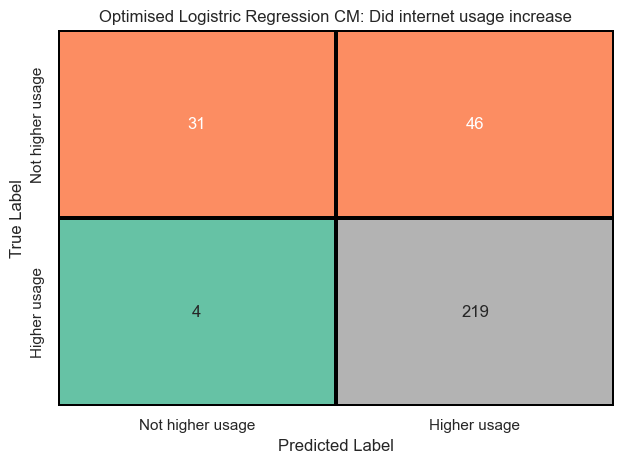

In [56]:
# generate predictions and confusion matrix
y_pred_lrmo = lrmo.predict(X_test_reduced)
cm = confusion_matrix(y_test, y_pred_lrmo)

# plot using Set2 palette
sns.heatmap(cm, annot=True, fmt='d', cmap='Set2', cbar=False,
            linewidths=1.5, linecolor='black',
            xticklabels=['Not higher usage', 'Higher usage'],
            yticklabels=["Not higher usage", 'Higher usage'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Optimised Logistric Regression CM: Did internet usage increase', fontsize=12)
plt.tight_layout()
plt.show()

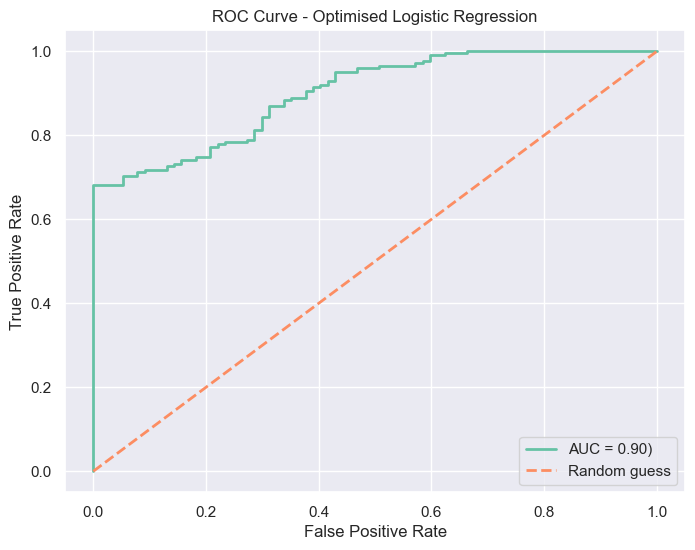

In [57]:
# get predicted probabilities for the positive class
y_proba_lrmo = lrmo.predict_proba(X_test_reduced)[:, 1]

# create ROC curve values
fpr, tpr, thresholds = roc_curve(y_test, y_proba_lrmo)

# create ROC-AUC score
roc_auc = roc_auc_score(y_test, y_proba_lrmo)
palette = sns.color_palette("Set2")
roc_colour = palette[0] 

# plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color=roc_colour, lw=2, label=f'AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color=palette[1], lw=2, linestyle='--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Optimised Logistic Regression')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


The retrained LR model’s metrics demonstrated more realistic performance with a test accuracy of 83 and ROC AUC of 90.  The classification report showed strong performance for the majority class (class 1), with precision of 83%, recall of 98%, and F1-score of 90.  However, the minority class (class 0) exhibited lower recall (40%) and F1-score (55%), indicating that many true negatives were missed.  The confusion matrix reflected this imbalance, with 219 true positives, 31 true negatives, 4 false negatives, and 46 false positives.
The retrained model’s performance, while less “perfect,” is far more trustworthy.  The removal of highly correlated features and the use of hyperparameter tuning restored model integrity and reduced the risk of overfitting.  The ROC curve comparison highlights the improved generalisation of the optimised model, with strong class separation and reduced prediction bias.  The trade-off between precision and recall in class 0 should be considered in the context of the application domain. If false negatives carry a higher cost, further balancing techniques or alternative models may be explored.

RANDOM FOREST CLASSIFIER

In [58]:
# create the model
rf = RandomForestClassifier(n_estimators=100, 
                            max_depth=None, 
                            class_weight='balanced', 
                            random_state=42)

# fit and train the model
rf.fit(X_train, y_train)

# make predictions and receive the accuracy results for the trained and test datasets
y_pred_rf = rf.predict(X_test)

# evaluate accurary
train_accuracy = rf.score(X_train, y_train)
test_accuracy = accuracy_score(y_test, y_pred)

# Print results
print("Random Forest Classifier: base model")
print(f"Accuracy on training set: {train_accuracy:.2f}")
print(f"Accuracy on test set: {test_accuracy:.2f}")
print("Baseline Model: Random Forest Classifier")
print(classification_report(y_test, y_pred_rf))

Random Forest Classifier: base model
Accuracy on training set: 1.00
Accuracy on test set: 1.00
Baseline Model: Random Forest Classifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        77
           1       1.00      1.00      1.00       223

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



In [59]:
# cross validation scores, using k-fold and summarise the results by the mean score
scores = cross_val_score(rf, X_train, y_train)
formatted_scores = [f"{score:.2f}" for score in scores]
average_score = f"{scores.mean():.2f}"

# Display results
print("k-fold results for Random Forest Classifier: base model")
print("Cross validation scores on training set: {}".format(formatted_scores))
print("The average cross validation score for the training set: {}".format(average_score))


k-fold results for Random Forest Classifier: base model
Cross validation scores on training set: ['1.00', '1.00', '1.00', '1.00', '0.99']
The average cross validation score for the training set: 1.00


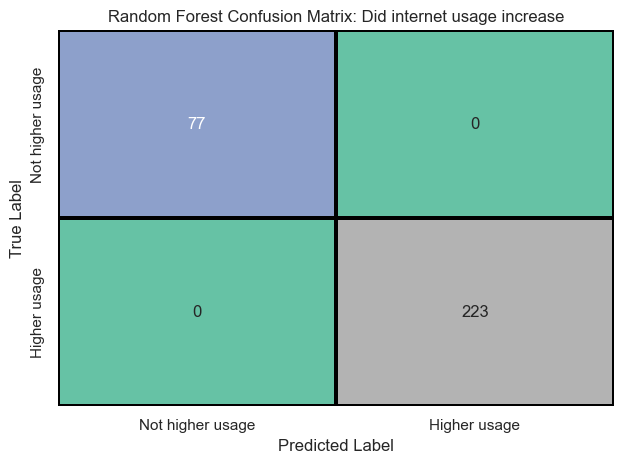

In [60]:
# generate predictions and confusion matrix
y_pred_rf = rf.predict(X_test)
cmrf = confusion_matrix(y_test, y_pred_rf)

# plot using Set2 palette
sns.heatmap(cmrf, annot=True, fmt='d', cmap='Set2', cbar=False,
            linewidths=1.5, linecolor='black',
            xticklabels=['Not higher usage', 'Higher usage'],
            yticklabels=["Not higher usage", 'Higher usage'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Random Forest Confusion Matrix: Did internet usage increase', fontsize=12)
plt.tight_layout()
plt.show()

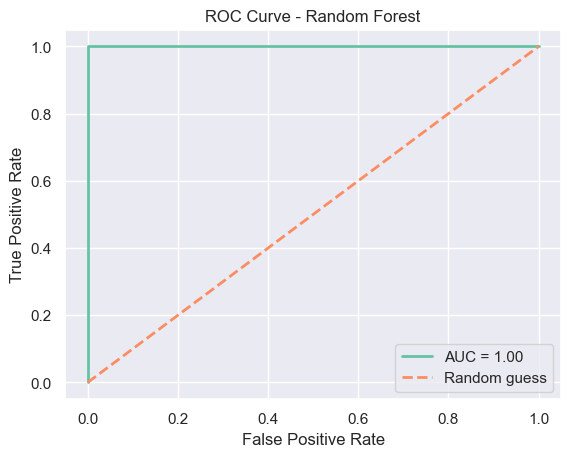

In [61]:
# get predicted probabilities for the positive class
y_proba_rf = rf.predict_proba(X_test)[:, 1]

# create ROC curve values
fpr, tpr, _ = roc_curve(y_test, y_proba_rf)

# create ROC-AUC score
roc_auc = roc_auc_score(y_test, y_proba)
palette = sns.color_palette("Set2")
roc_colour = palette[0] 

# plot ROC curve
plt.Figure(figsize=(8, 6))
plt.plot(fpr, tpr, color=roc_colour, lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color=palette[1], lw=2, linestyle='--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

A RF model was developed using the same methodology applied to LR model.  Consistent with the LR results, the RF model produced perfect performance metrics across both the training and testing sets, with accuracy, precision, recall, and F1-score all scoring 1.  Additional evaluation using a classification report, k-fold cross-validation, confusion matrix, and ROC curve further confirmed these outcomes, mirroring the results observed in the initial LR model. Concerns regarding potential overfitting, data leakage, or the presence of redundant features needed to be explored.  Features of importance was carried out, which indicated the top ten features.  

In [62]:
# check for features of importance
feature_importances = pd.Series(rf.feature_importances_, index=X_train.columns)

In [63]:
# Sort from most to least important
feature_importances = feature_importances.sort_values(ascending=False)

# Print top features
print("Top Features by Importance:")
print(feature_importances.head(10))



Top Features by Importance:
usageBefore_encoded    0.432419
usageAfter_encoded     0.165844
durationSupport        0.080040
postcode_score         0.045970
freedevice             0.037324
freeinternet           0.028962
economic_encoded       0.024492
age_group              0.024213
afterrate              0.021538
socialtariff           0.011520
dtype: float64


C:\Users\nicol\AppData\Local\Temp\ipykernel_7208\445128967.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette=palette)


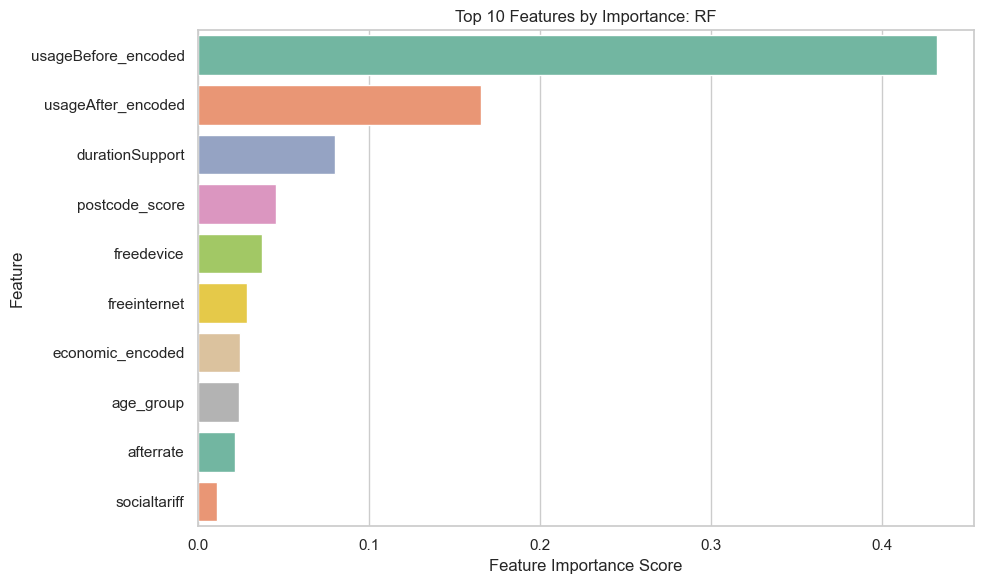

In [64]:
# select top 10
top_features = feature_importances.sort_values(ascending=False).head(10)

# set plot style and palette
sns.set(style="whitegrid")
palette = sns.color_palette("Set2", len(top_features))

# create horizontal bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=top_features.values, y=top_features.index, palette=palette)

# add labels and title
plt.xlabel("Feature Importance Score")
plt.ylabel("Feature")
plt.title("Top 10 Features by Importance: RF")
plt.tight_layout()
plt.show()

To address these concerns five features were selected, then upon closer inspection, it was felt that ‘usage After’ might create a data leak, so this was dropped, narrowing the features to four.  A new pruned dataset was created.  

In [65]:
selected_features = [
    'usageBefore_encoded',
    'durationSupport',
    'postcode_score',
    'freedevice',
    ]

# subset data
X_train_pruned = X_train[selected_features]
X_test_pruned = X_test[selected_features]

In [66]:
# list all the hyperparameters currently set in the model
pprint(rf.get_params())

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [67]:
# define the model for grid search

# select between samples or using full dataset
bootstrap =[True,False]

# Select the criterion to measure the quality of a split
criterion =['gini', 'entropy']

# maximum number of levels in tree
max_depth =[3, 5, 7, 10]

# number of features to consider at every split
max_features = ['log2', 'sqrt']

# minimum number of samples required to be at a leaf node
min_samples_split = [5, 10]

# minimum weighted fraction of the sum total of weights required to be at a␣leaf node
min_samples_leaf = [2, 5, 10]

# number of trees in the forest
n_estimators = [50, 100, 200, 500]

# create the grid
rfmo_param = {'bootstrap': bootstrap,
                'criterion': criterion,
                'max_depth': max_depth,
                'max_features': max_features,
                'min_samples_split': min_samples_split,
                'min_samples_leaf': min_samples_leaf,
                'n_estimators': n_estimators,
                }

pprint(rfmo_param)

{'bootstrap': [True, False],
 'criterion': ['gini', 'entropy'],
 'max_depth': [3, 5, 7, 10],
 'max_features': ['log2', 'sqrt'],
 'min_samples_leaf': [2, 5, 10],
 'min_samples_split': [5, 10],
 'n_estimators': [50, 100, 200, 500]}


The model was then fine tuned using Randomised Search Grid, which identified optimal hyperparameters.

In [68]:
 # fit and train the model, using Randomised Grid Search
 # search across different combinations
rfmo_search = RandomizedSearchCV(estimator = rf, param_distributions=rfmo_param, n_iter=100, 
                                 cv=3, verbose=2, random_state=42, n_jobs =-1, error_score='raise',
                                 scoring='accuracy', return_train_score=True)

rfmo_search.fit(X_train_reduced, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


,estimator,RandomForestC...ndom_state=42)
,param_distributions,"{'bootstrap': [True, False], 'criterion': ['gini', 'entropy'], 'max_depth': [3, 5, ...], 'max_features': ['log2', 'sqrt'], ...}"
,n_iter,100
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,3
,verbose,2
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,'raise'


In [69]:
print("Best parameters:", rfmo_search.best_params_)
rfmo_model = rfmo_search.best_estimator_

Best parameters: {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 10, 'criterion': 'entropy', 'bootstrap': True}


In [70]:
# retrain the new model
rfmo = RandomForestClassifier(n_estimators=50, min_samples_split=5, min_samples_leaf=2, 
                              max_features='log2', max_depth=10, criterion='entropy', 
                              bootstrap=False)
rfmo.fit(X_train_pruned, y_train)

# predicitions
y_pred_rfmo = rfmo.predict(X_test_pruned)
y_proba_rfmo = rfmo.predict_proba(X_test_pruned)[:, 1]

# evaluate accuracy
train_accuracy = rfmo.score(X_train_pruned, y_train)
test_accuracy = accuracy_score(y_test, y_pred_rfmo)

# Print results
print(f"Accuracy on training set: {train_accuracy:.2f}")
print(f"Accuracy on test set: {test_accuracy:.2f}")

# Metrics
print("Optimised Model: Random Forest Classifier")
print(classification_report(y_test, y_pred_rfmo))

Accuracy on training set: 0.93
Accuracy on test set: 0.93
Optimised Model: Random Forest Classifier
              precision    recall  f1-score   support

           0       0.91      0.82      0.86        77
           1       0.94      0.97      0.96       223

    accuracy                           0.93       300
   macro avg       0.93      0.90      0.91       300
weighted avg       0.93      0.93      0.93       300



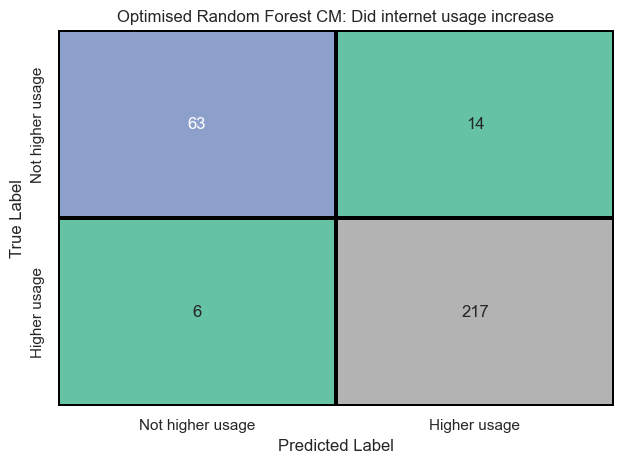

In [71]:
# generate predictions and confusion matrix
y_pred_rfmo = rfmo.predict(X_test_pruned)
cm = confusion_matrix(y_test, y_pred_rfmo)

# plot using Set2 palette
sns.heatmap(cm, annot=True, fmt='d', cmap='Set2', cbar=False,
            linewidths=1.5, linecolor='black',
            xticklabels=['Not higher usage', 'Higher usage'],
            yticklabels=["Not higher usage", 'Higher usage'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Optimised Random Forest CM: Did internet usage increase', fontsize=12)
plt.tight_layout()
plt.show()

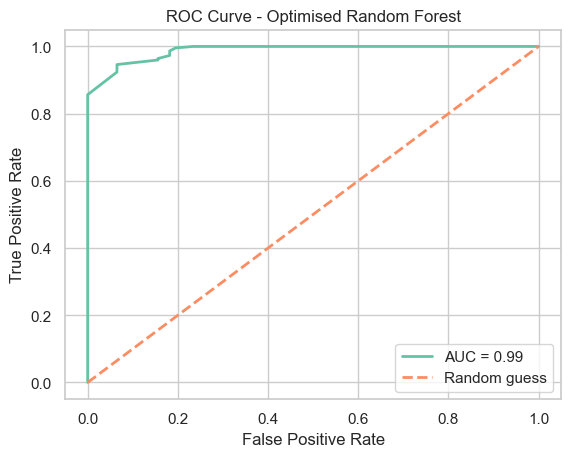

In [72]:
# get predicted probabilities for the positive class
y_proba_rfmo = rfmo.predict_proba(X_test_pruned)[:, 1]

# create ROC curve values
fpr, tpr, _ = roc_curve(y_test, y_proba_rfmo)

# create ROC-AUC score
roc_auc = roc_auc_score(y_test, y_proba_rfmo)
palette = sns.color_palette("Set2")
roc_colour = palette[0] 

# plot ROC curve
plt.Figure(figsize=(8, 6))
plt.plot(fpr, tpr, color=roc_colour, lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color=palette[1], lw=2, linestyle='--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Optimised Random Forest')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

The retrained RL model’s metrics (figure xx) demonstrated more realistic performance with a test accuracy of 93 and ROC AUC of 99.  The classification report showed strong performance for the majority class (class 1), with precision of 94%, recall of 97%, and F1-score of 96.  However, the minority class (class 0) exhibited slightly lower recall (82%) and F1-score (86%), indicating that some true negatives were missed.  The confusion matrix reflected this imbalance, with 217 true positives, 63 true negatives, 14 false negatives, and 6 false positives.  

Random Forest Classifier performed better than Logistic Regression

*** REGRESSION SECTION ***

LINEAR REGRESSION

Predict confidence score based on duration of support.

In [73]:
# create a new df
df_lreg = df_usage.copy()

To explore the relationship between support duration and changes in confidence levels, a regression approach was adopted. The goal was to predict a newly engineered target variable, the confidence score, which represents the difference between post-intervention and pre-intervention confidence rates.  
A simple regression model was selected as a starting point to establish baseline performance and assess the linearity of the relationship. Depending on the results, more complex algorithms could be considered later to capture non-linear patterns.  
A regression plot was generated to visually examine how the duration of support aligns with the confidence score. This helped evaluate whether the feature contributes meaningfully to predicting changes in confidence and informed subsequent model selection.

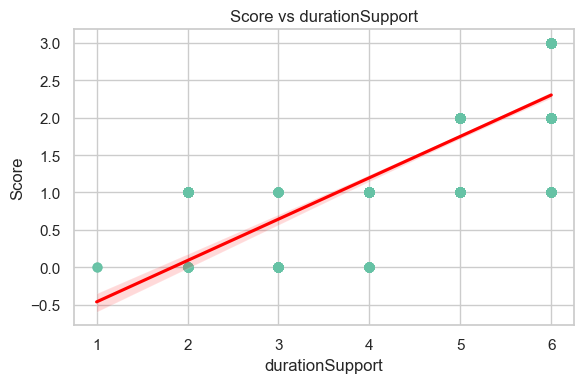

In [74]:
# create confidence score (target variable)
df_lreg['score'] = df_lreg['afterrate'] - df_lreg['beforerate']

# define features and target
X = df_lreg[['durationSupport']]
y = df_lreg['score']

# visualise the data
sns.set_palette("Set2")
# Loop through each feature
for feature in X.columns:
    plt.figure(figsize=(6, 4))
    sns.regplot(x=df_lreg[feature], y=df_lreg['score'],
                scatter_kws={'s': 40}, 
                line_kws={'color': 'red'})
    plt.title(f'Score vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('Score')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

The upward sloping line indicates a positive correleation between duration and confidence score.  Indicating the long the support lasts, the higher the confidence level, and therefore duration of support is a useful predictor. 

In [75]:
# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training class distribution:\n", y_train.value_counts())
print("Testing class distribution:\n", y_test.value_counts())

# fit model
lreg = LinearRegression()
lreg.fit(X_train, y_train)

y_pred = lreg.predict(X_test)

Training class distribution:
 score
1    442
2    386
3    311
0     61
Name: count, dtype: int64
Testing class distribution:
 score
2    106
1     98
3     85
0     11
Name: count, dtype: int64


In [76]:
#  evaluate metrics and findings 
print("Linear Regression: Basedline Model Findings")
print("R² score / Coefficient of determination: {:.2f}".format(lreg.score(X_test, y_test)))
print("Intercept: {:.2f}".format(lreg.intercept_))
print("Slope:", [f"{coef:.2f}" for coef in lreg.coef_])
print("\nCoefficients:")
for feature, coef in zip(X.columns, lreg.coef_):
    print(f"{feature}: {coef:.2f}")
    
# evaluate model performance use Mean Absolute Errors, Mean Squared Errors 
# and Root Mean Squared Errors
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")


Linear Regression: Basedline Model Findings
R² score / Coefficient of determination: 0.61
Intercept: -1.02
Slope: ['0.55']

Coefficients:
durationSupport: 0.55
MAE: 0.47
MSE: 0.29
RMSE: 0.54


C:\Users\nicol\AppData\Local\Temp\ipykernel_7208\3931231368.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), ax=axs[0], palette="Set2")


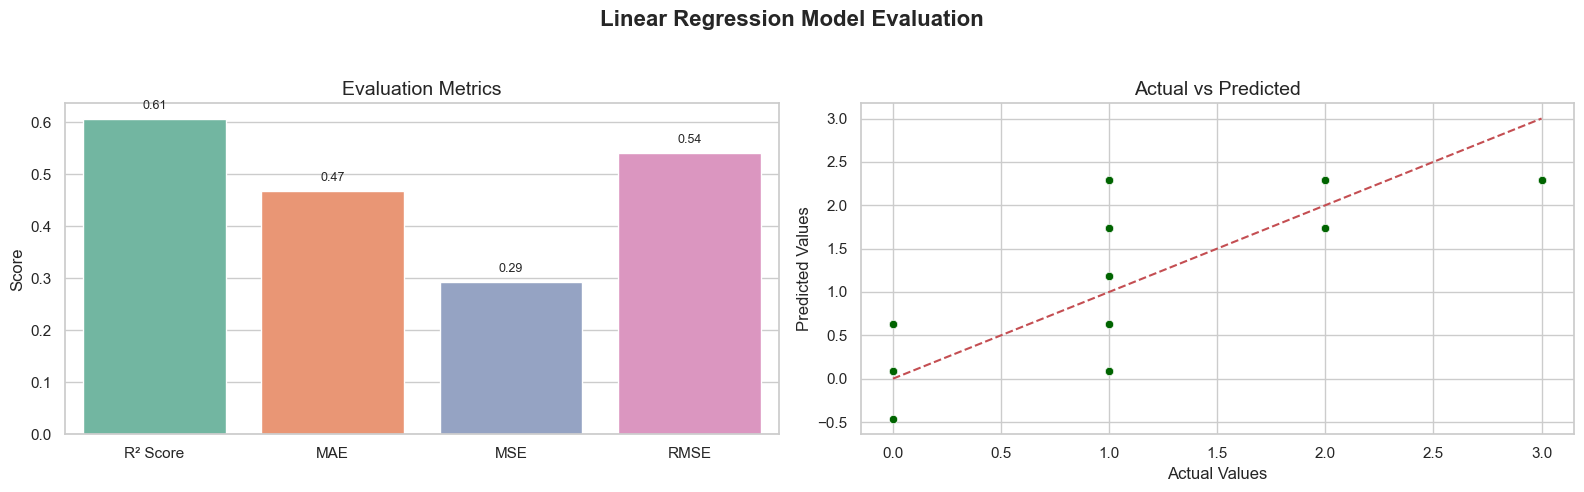

In [77]:
# calculate metrics
y_pred = lreg.predict(X_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# figure layout
fig, axs = plt.subplots(1, 2, figsize=(16, 5))
sns.set(style="whitegrid")

# bar chart
metrics = {'R² Score': r2, 'MAE': mae, 'MSE': mse, 'RMSE': rmse}
bars = sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), ax=axs[0], palette="Set2")
axs[0].set_title("Evaluation Metrics", fontsize=14)
axs[0].set_ylabel("Score")

# labels to bars
for bar in bars.patches:
    height = bar.get_height()
    bars.annotate(f'{height:.2f}',
                  xy=(bar.get_x() + bar.get_width() / 2, height),
                  xytext=(0, 5),
                  textcoords="offset points",
                  ha='center', va='bottom', fontsize=9)

# scatter plot
sns.scatterplot(x=y_test, y=y_pred, ax=axs[1], color='darkgreen')
axs[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
axs[1].set_title("Actual vs Predicted", fontsize=14)
axs[1].set_xlabel("Actual Values")
axs[1].set_ylabel("Predicted Values")

plt.suptitle("Linear Regression Model Evaluation", fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

The model achieved an R² score of 0.61, indicating that 61% of the variation in confidence scores can be explained by support duration. When the duration of support is nil weeks, the predicted confidence score is -1.02, since support duration cannot be zero, the value isn't meaningful in this experiment. The slope coefficient of 0.55 suggests a positive relationship, where each additional week of support corresponds to a 0.55 unit increase in confidence.  
Error metrics MAE: 0.47 (models predictions are off by 0.47, lower values are better), MSE: 0.29 (average square difference between predicted and actual scores.  Larger erros are more heavily penalised)and RMSE: 0.54 (more interpretable error metric, typical prediction error is half way point) show moderate prediction accuracy, supporting the model’s usefulness as a baseline. 

RANDOM FOREST REGRESSOR 

The Random Forest Regressor was chosen for its ability to model nonlinear relationships and complex feature interactions, making it well-suited for capturing patterns that simpler models might miss.  Additionally, it offers built-in measures of feature importance, which aid in interpretability, and is generally more resistant to overfitting compared to a single Decision Tree. This approach reflects a progressive modelling strategy, beginning with simpler techniques and advancing to more sophisticated algorithms as needed to improve performance and insight.
For the purpose of this experiment, two models were created, one using negatively skewed data, the second using positively skewed data.  To compare the differences.

NEGATIVE SKEWED DATA

In [78]:
# create new dataframe
df_rfr_neg = df_usage.copy()

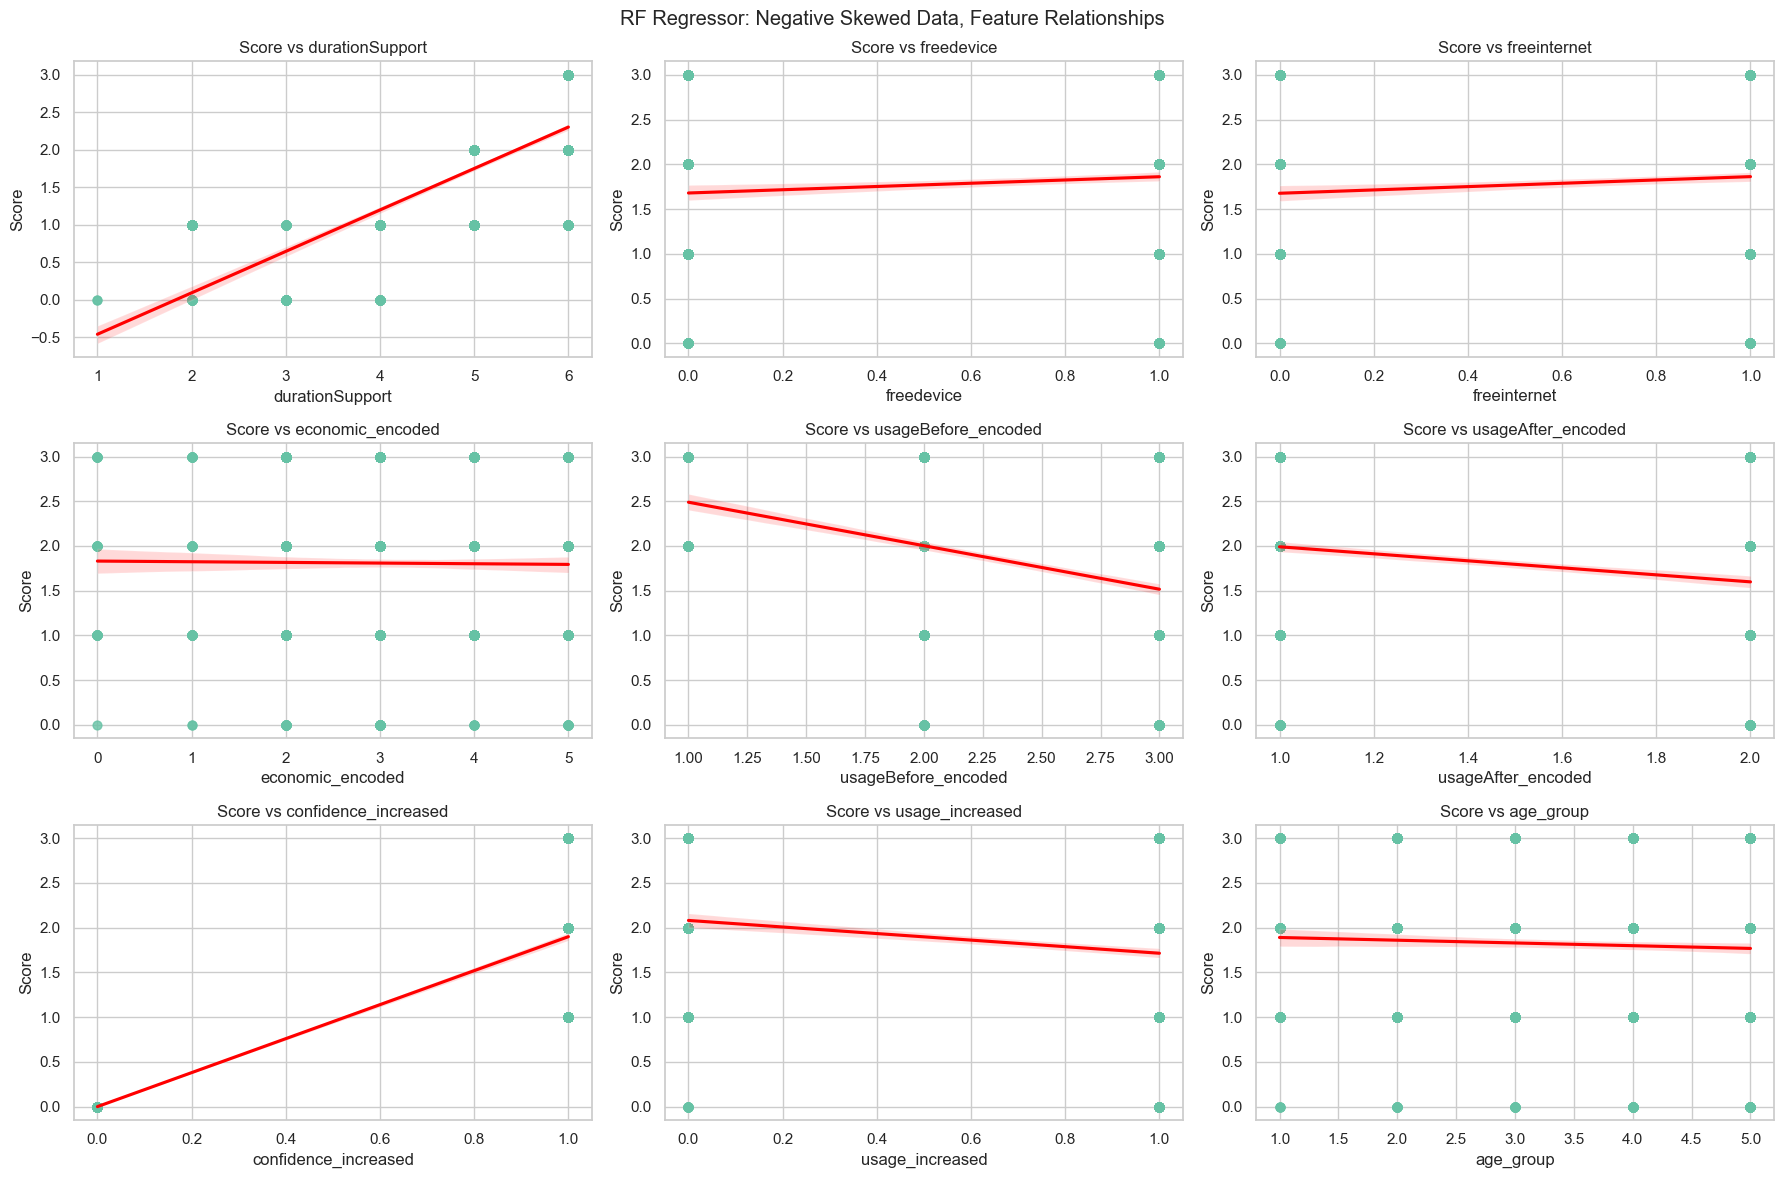

In [79]:
# based on earlier exploratory data anaylsis, only select variables which indicated a negative skewness were selected
# create target variable
df_rfr_neg['score'] = df_rfr_neg['afterrate'] - df_rfr_neg['beforerate']

# select relevant features (neg skew)
X_neg = df_rfr_neg[['durationSupport','freedevice', 'freeinternet', 
            'economic_encoded', 'usageBefore_encoded', 'usageAfter_encoded',
            'confidence_increased', 'usage_increased', 'age_group']]
y_neg = df_rfr_neg['score'] 

# Set up grid dimensions
num_features = len(X_neg.columns)
cols = 3  # Number of columns in the grid
rows = (num_features + cols - 1) // cols  # Calculate rows needed

sns.set_palette("Set2")
fig, axes = plt.subplots(rows, cols, figsize=(18, 4 * rows))
axes = axes.flatten()  # Flatten in case of multiple rows
fig.suptitle("RF Regressor: Negative Skewed Data, Feature Relationships")

# Loop through each feature and plot
for i, feature in enumerate(X_neg.columns):
    sns.regplot(x=df_rfr_neg[feature], y=df_rfr_neg['score'],
                ax=axes[i],
                scatter_kws={'s': 40},
                line_kws={'color': 'red'})
    axes[i].set_title(f'Score vs {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Score')
    axes[i].grid(True)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [80]:
# split data
X_train_neg, X_test_neg, y_train_neg, y_test_neg = train_test_split(X_neg, y_neg, test_size=0.2, random_state=42)
print("Randon Forest Regression: Negative Skewed Data")
print("Training class distribution:\n", y_train_neg.value_counts())
print("Testing class distribution:\n", y_test_neg.value_counts())

# fit and train the model
rfr_neg = RandomForestRegressor(n_estimators=100, random_state=42)
rfr_neg.fit(X_train_neg, y_train_neg)

# make predictions
y_pred_neg = rfr_neg.predict(X_test_neg)


Randon Forest Regression: Negative Skewed Data
Training class distribution:
 score
1    442
2    386
3    311
0     61
Name: count, dtype: int64
Testing class distribution:
 score
2    106
1     98
3     85
0     11
Name: count, dtype: int64


In [81]:
#  evaluate metrics and findings
print("Random Forest Regression: Neg Skewed Data")
print(f"R² score / Coefficient of determination: {rfr_neg.score(X_test_neg, y_test_neg):.2f}")

# evaluate model performance use Mean Absolute Errors, Mean Squared Errors 
# and Root Mean Squared Errors
mae_neg = mean_absolute_error(y_test_neg, y_pred_neg)
mse_neg = mean_squared_error(y_test_neg, y_pred_neg)
rmse_neg = mse ** 0.5

print(f"MAE: {mae_neg:.2f}")
print(f"MSE: {mse_neg:.2f}")
print(f"RMSE: {rmse_neg:.2f}")
mae_neg = mean_absolute_error(y_test_neg, y_pred_neg)
mse = mean_squared_error(y_test, y_pred)

Random Forest Regression: Neg Skewed Data
R² score / Coefficient of determination: 0.69
MAE: 0.35
MSE: 0.23
RMSE: 0.54


C:\Users\nicol\AppData\Local\Temp\ipykernel_7208\1720137604.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(data=metrics_df_neg, x='Metric', y='Value', ax=axs[0], palette="Set2")


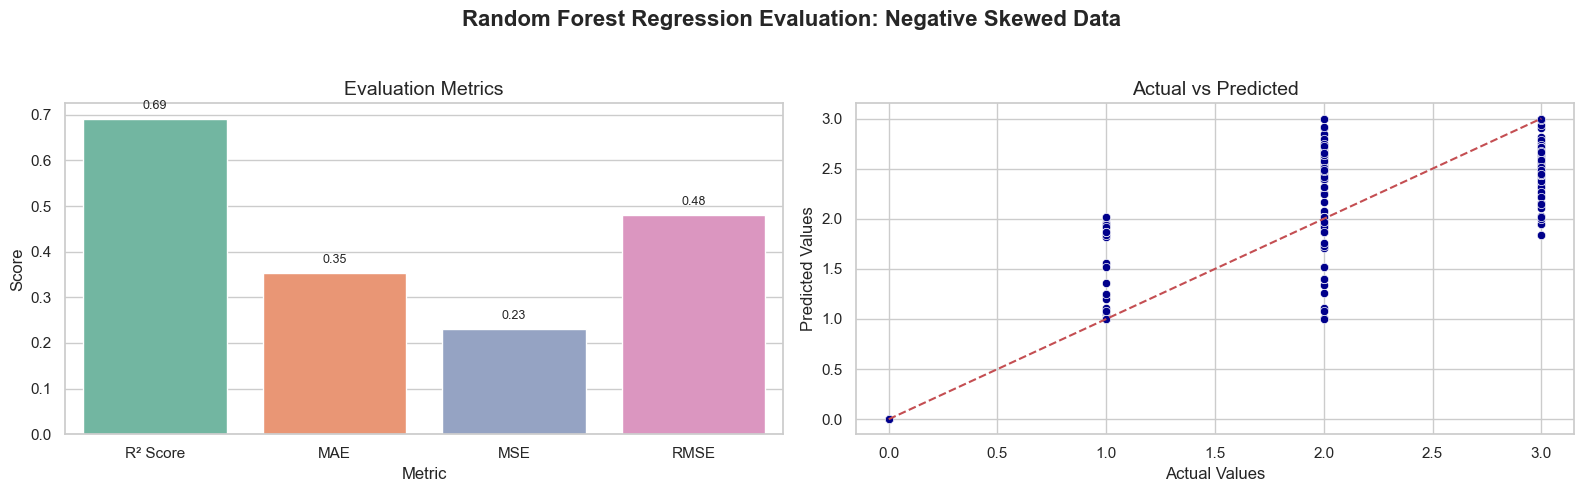

In [82]:
# calculate metrics
y_pred_neg = rfr_neg.predict(X_test_neg)
r2_neg = rfr_neg.score(X_test_neg, y_test_neg)
mae_neg = mean_absolute_error(y_test_neg, y_pred_neg)
mse_neg = mean_squared_error(y_test_neg, y_pred_neg)
rmse_neg = np.sqrt(mse_neg)

# metrics DataFrame
metrics_df_neg = pd.DataFrame({
    'Metric': ['R² Score', 'MAE', 'MSE', 'RMSE'],
    'Value': [r2_neg, mae_neg, mse_neg, rmse_neg]
})

# figure layout
fig, axs = plt.subplots(1, 2, figsize=(16, 5))
sns.set(style="whitegrid")

# bar chart
bars = sns.barplot(data=metrics_df_neg, x='Metric', y='Value', ax=axs[0], palette="Set2")
axs[0].set_title("Evaluation Metrics", fontsize=14)
axs[0].set_ylabel("Score")

# add labels to bars
for bar in bars.patches:
    height = bar.get_height()
    bars.annotate(f'{height:.2f}',
                  xy=(bar.get_x() + bar.get_width() / 2, height),
                  xytext=(0, 5),
                  textcoords="offset points",
                  ha='center', va='bottom', fontsize=9)

# scatter plot
sns.scatterplot(x=y_test_neg, y=y_pred_neg, ax=axs[1], color='darkblue')
axs[1].plot([y_test_neg.min(), y_test_neg.max()], [y_test_neg.min(), y_test_neg.max()], 'r--')
axs[1].set_title("Actual vs Predicted", fontsize=14)
axs[1].set_xlabel("Actual Values")
axs[1].set_ylabel("Predicted Values")

plt.suptitle("Random Forest Regression Evaluation: Negative Skewed Data", fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

The model achieved an R² score of 0.69, indicating that 69% of the variation in confidence scores can be explained by support duration, reflects a strong fit, suggesting the model captures meaningful patterns in the data.  Random Forest Regressor doesn't use coefficients like linear models do, therefore Intercept and Slope were not used.  Even those no linear equation like y=mx+b, you still get predicted value by actual vs predicted values, its measure is predictive power, not model structure.
Error metrics MAE: 0.35, relatively low error, indicating good predictive accuracy. MSE: 0.23, suggesting the model isn't making large mistakes.  RMSE: 0.63 show prediction error just over half a point on the confidence scale, 0-3, which is acceptable, where variability is expected. 

POSITIVE SKEWED DATA

In [83]:
# create new dataframe
df_rfr_pos = df_usage.copy()

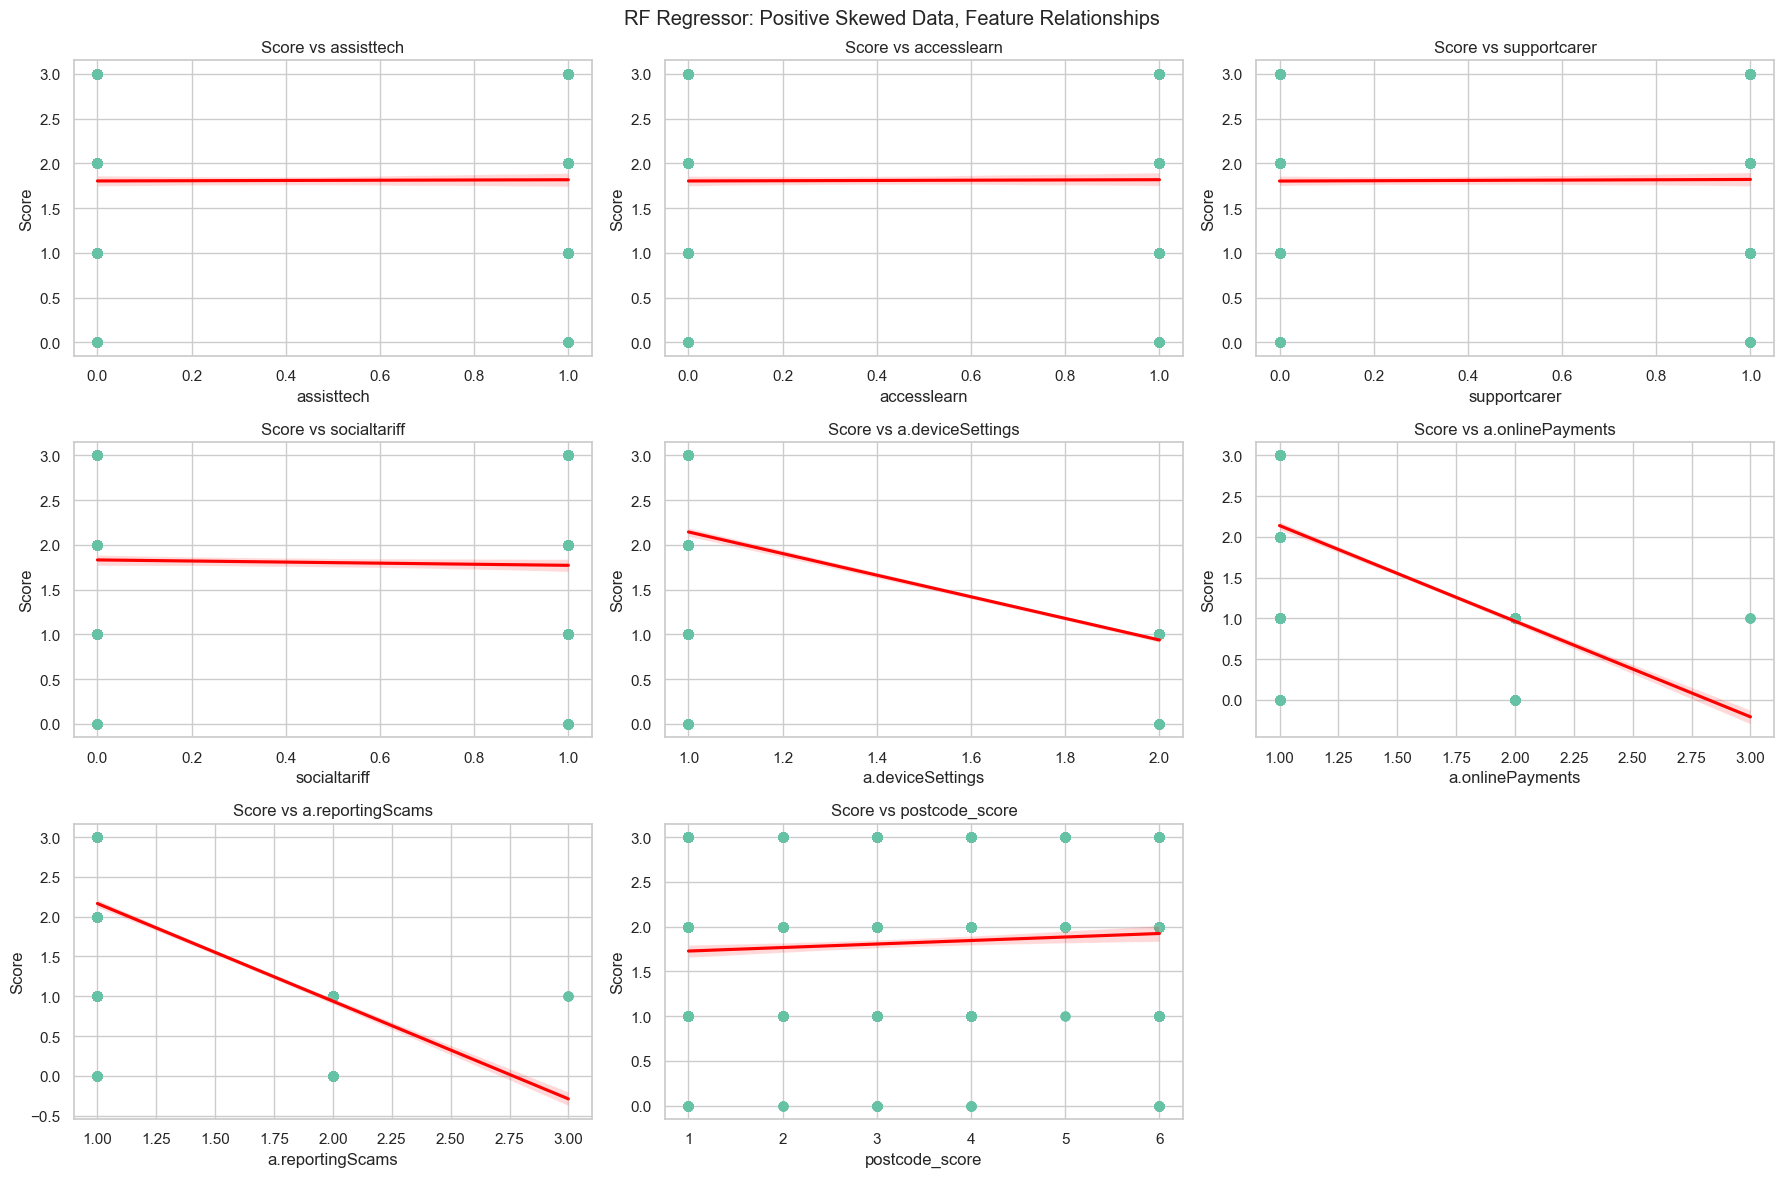

In [84]:
# based on earlier exploratory data anaylsis, only select variables which indicated a positive skewness
# create confidence gain (TV)
df_rfr_pos['score'] = df_rfr_pos['afterrate'] - df_rfr_pos['beforerate']

# select relevant features
X_pos = df_rfr_pos[['assisttech','accesslearn', 'supportcarer', 
            'socialtariff', 'a.deviceSettings', 'a.onlinePayments',
            'a.reportingScams', 'postcode_score']]
y_pos = df_rfr_pos['score'] 

# Set up grid dimensions
num_features = len(X_pos.columns)
cols = 3  # Number of columns in the grid
rows = (num_features + cols - 1) // cols  # Calculate rows needed

sns.set_palette("Set2")
fig, axes = plt.subplots(rows, cols, figsize=(18, 4 * rows))
axes = axes.flatten()  # Flatten in case of multiple rows
fig.suptitle("RF Regressor: Positive Skewed Data, Feature Relationships")

# Loop through each feature and plot
for i, feature in enumerate(X_pos.columns):
    sns.regplot(x=df_rfr_pos[feature], y=df_rfr_pos['score'],
                ax=axes[i],
                scatter_kws={'s': 40},
                line_kws={'color': 'red'})
    axes[i].set_title(f'Score vs {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Score')
    axes[i].grid(True)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [85]:

# split data
X_train_pos, X_test_pos, y_train_pos, y_test_pos = train_test_split(X_pos, y_pos, test_size=0.2, random_state=42)
print("RandomForestRegressor: Positive Skewed Data")
print("Training class distribution:\n", y_train_pos.value_counts())
print("Testing class distribution:\n", y_test_pos.value_counts())

# fit and train the model
rfr_pos = RandomForestRegressor(n_estimators=100, random_state=42)
rfr_pos.fit(X_train_pos, y_train_pos)

# make predictions
y_pred_pos = rfr_pos.predict(X_test_pos)


RandomForestRegressor: Positive Skewed Data
Training class distribution:
 score
1    442
2    386
3    311
0     61
Name: count, dtype: int64
Testing class distribution:
 score
2    106
1     98
3     85
0     11
Name: count, dtype: int64


In [86]:
#  evaluate
print(f"R² score: {rfr_pos.score(X_test_pos, y_test_pos):.2f}")
# evaluate model performance use Mean Absolute Errors, Mean Squared Errors 
# and Root Mean Squared Errors
mae_pos = mean_absolute_error(y_test_pos, y_pred_pos)
mse_pos = mean_squared_error(y_test_pos, y_pred_pos)
rmse_pos = mse ** 0.5

print(f"MAE: {mae_pos:.2f}")
print(f"MSE: {mse_pos:.2f}")
print(f"RMSE: {rmse_pos:.2f}")
mae_pos = mean_absolute_error(y_test_pos, y_pred_pos)
mse_pos = mean_squared_error(y_test_pos, y_pred_pos)

R² score: 0.47
MAE: 0.44
MSE: 0.39
RMSE: 0.54


C:\Users\nicol\AppData\Local\Temp\ipykernel_7208\2491715798.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(data=metrics_df_pos, x='Metric', y='Value', ax=axs[0], palette="Set2")


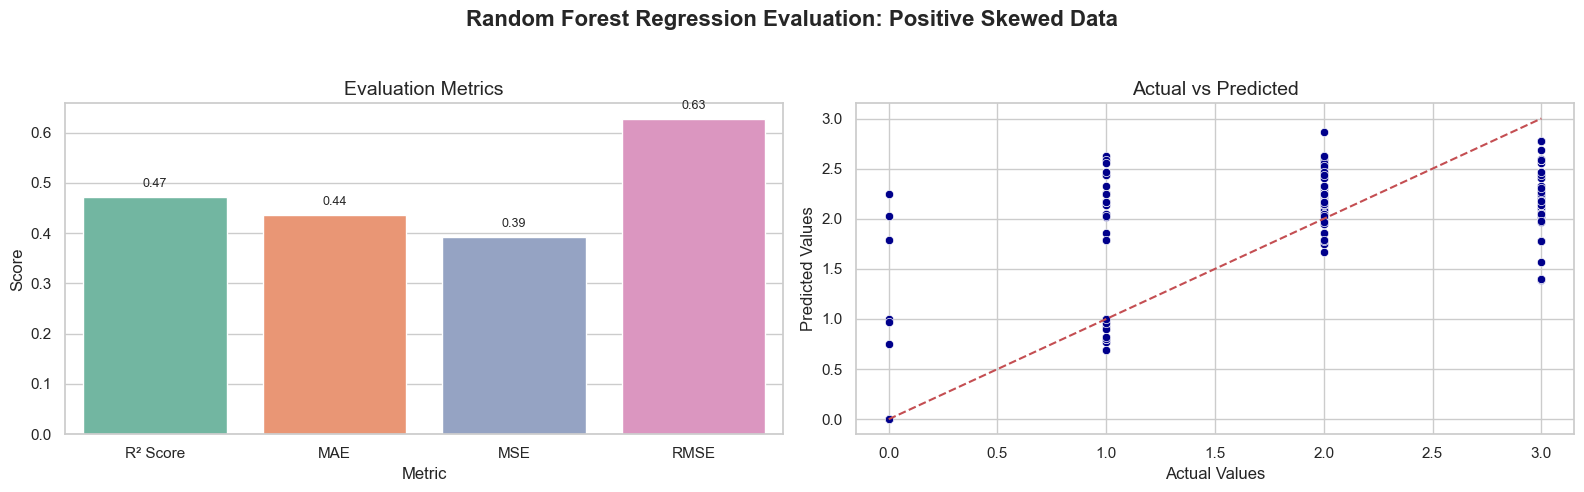

In [87]:
# calculate metrics
y_pred_pos = rfr_pos.predict(X_test_pos)
r2_pos = rfr_pos.score(X_test_pos, y_test_pos)
mae_pos = mean_absolute_error(y_test_pos, y_pred_pos)
mse_pos = mean_squared_error(y_test_pos, y_pred_pos)
rmse_pos = np.sqrt(mse_pos)

# metrics DataFrame
metrics_df_pos = pd.DataFrame({
    'Metric': ['R² Score', 'MAE', 'MSE', 'RMSE'],
    'Value': [r2_pos, mae_pos, mse_pos, rmse_pos]
})

# figure layout
fig, axs = plt.subplots(1, 2, figsize=(16, 5))
sns.set(style="whitegrid")

# bar chart
bars = sns.barplot(data=metrics_df_pos, x='Metric', y='Value', ax=axs[0], palette="Set2")
axs[0].set_title("Evaluation Metrics", fontsize=14)
axs[0].set_ylabel("Score")

# add labels to bars
for bar in bars.patches:
    height = bar.get_height()
    bars.annotate(f'{height:.2f}',
                  xy=(bar.get_x() + bar.get_width() / 2, height),
                  xytext=(0, 5),
                  textcoords="offset points",
                  ha='center', va='bottom', fontsize=9)

# scatter plot
sns.scatterplot(x=y_test_pos, y=y_pred_pos, ax=axs[1], color='darkblue')
axs[1].plot([y_test_pos.min(), y_test_pos.max()], [y_test_pos.min(), y_test_pos.max()], 'r--')
axs[1].set_title("Actual vs Predicted", fontsize=14)
axs[1].set_xlabel("Actual Values")
axs[1].set_ylabel("Predicted Values")

plt.suptitle("Random Forest Regression Evaluation: Positive Skewed Data", fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

The Random Forest Regressor trained on positively skewed data achieved an R² score of 0.47, indicating that 47% of the variance in confidence scores is explained by the model. While this reflects moderate predictive power, it is notably lower than the performance observed with negatively skewed data. Error metrics (MAE: 0.44, RMSE: 0.63) suggest a reasonable but less precise fit. These results highlight the impact of data distribution on model performance and reinforce the importance of careful feature selection and preprocessing when working with skewed variables.

The model trained on negatively skewed data demonstrated superior performance, likely due to the presence of more consistent and informative examples that facilitated effective learning. This resulted in a higher R² score and reduced prediction error. To build on these findings, additional experiments were conducted to explore whether the initial model’s results could be further enhanced.

In [88]:
# check first model for feature importance
importances = rfr_neg.feature_importances_
features = X_neg.columns
print("Features:", list(features))
print("Importances:", list(importances))

Features: ['durationSupport', 'freedevice', 'freeinternet', 'economic_encoded', 'usageBefore_encoded', 'usageAfter_encoded', 'confidence_increased', 'usage_increased', 'age_group']
Importances: [np.float64(0.7632679481394803), np.float64(0.003964391847356804), np.float64(0.004408506084099412), np.float64(0.038704621918954116), np.float64(0.037504958274564536), np.float64(0.018356006942889747), np.float64(0.09182973148656157), np.float64(0.0036527959639595627), np.float64(0.03831103934213392)]


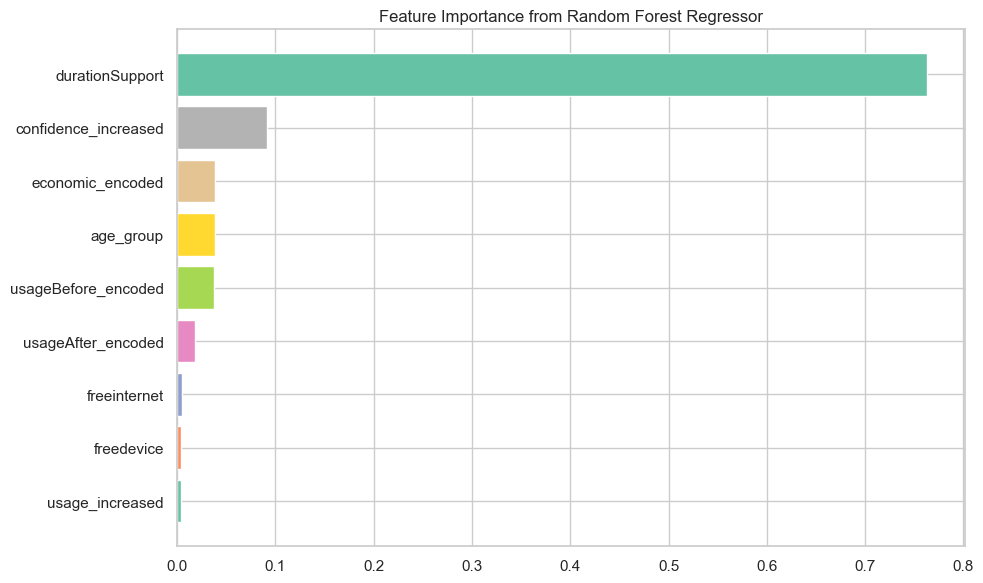

In [89]:
# check first model for feature importance
importances = rfr_neg.feature_importances_
features = X_neg.columns

df_importance = pd.DataFrame({'Feature': features, 'Importance': importances})
df_importance.sort_values(by='Importance', ascending=True, inplace=True)

# Get Set2 palette
palette = sns.color_palette("Set2", len(df_importance))

# Plot
plt.figure(figsize=(10, 6))
plt.barh(df_importance['Feature'], df_importance['Importance'], color=palette)
plt.title('Feature Importance from Random Forest Regressor')
plt.tight_layout()
plt.show()

In [90]:
selected_features = [
    'durationSupport',
    'confidence_increased',
    'economic_encoded',
    'age_group',
    'usageBefore_encoded',
]

# subset data
X_train_prune = X_train_neg[selected_features]
X_test_prune = X_test_neg[selected_features]

In [91]:
pprint(rfr_neg.get_params())

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [92]:
# redefine the model

# number of trees in the forest
n_estimators = [100, 200]

# Select the criterion to measure the quality of a split
criterion =['squared_error', 'absolute_error', 'friedman_mse', 'poisson']

# maximum depth of the tree
max_depth =[5, 10, 15, None]

# minimum number of samples required to split an internal node
min_samples_split = [2, 4]

# minimum number of samples required to be at a leaf node
min_samples_leaf = [1, 2]

# number of features to consider when looking for the best split
max_features = ['log2', 'sqrt', None]

# create the grid
rfr_neg_param =  {'n_estimators': n_estimators,
              'criterion': criterion,
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf,          
              'max_features': max_features,              
              'bootstrap': bootstrap,
                }

pprint(rfr_neg_param)

{'bootstrap': [True, False],
 'criterion': ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
 'max_depth': [5, 10, 15, None],
 'max_features': ['log2', 'sqrt', None],
 'min_samples_leaf': [1, 2],
 'min_samples_split': [2, 4],
 'n_estimators': [100, 200]}


In [93]:
# fine tun the model, using GridSearchVC
# initialise the Grid Search
rfr_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                         param_grid=rfr_neg_param,
                         cv=3,
                         n_jobs=-1,
                         scoring='neg_mean_squared_error')
# fit the grid search
rfr_search.fit(X_train_prune, y_train_neg)
# get the best parameters
best_params = rfr_search.best_params_
print(f"Best parameters: {best_params}")


Best parameters: {'bootstrap': True, 'criterion': 'squared_error', 'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [94]:
 # fit and train the new

rfrmo = RandomForestRegressor(bootstrap=True, criterion='squared_error', 
                              max_depth=5, max_features='log2', min_samples_leaf=1, 
                              min_samples_split=2, n_estimators=200)

# Fit the random search model
rfrmo.fit(X_train_prune, y_train_neg)
y_pred_rfrmo = rfrmo.predict(X_test_prune)

In [95]:
#  evaluate
print(f"R² score: {rfrmo.score(X_test_prune, y_test_neg):.2f}")
# evaluate model performance use Mean Absolute Errors, Mean Squared Errors 
# and Root Mean Squared Errors
mae_rfrmo = mean_absolute_error(y_test_neg, y_pred_rfrmo)
mse_rfrmo = mean_squared_error(y_test_neg, y_pred_rfrmo)
rmse_rfrmo = mse ** 0.5

print(f"MAE: {mae_rfrmo:.2f}")
print(f"MSE: {mse_rfrmo:.2f}")
print(f"RMSE: {rmse_rfrmo:.2f}")
mae_rfrmo = mean_absolute_error(y_test_neg, y_pred_rfrmo)
mse_rfrmo = mean_squared_error(y_test, y_pred_rfrmo)

R² score: 0.71
MAE: 0.38
MSE: 0.22
RMSE: 0.54


C:\Users\nicol\AppData\Local\Temp\ipykernel_7208\1637303998.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(data=metrics_df_final, x='Metric', y='Value', ax=axs[0], palette="Set2")


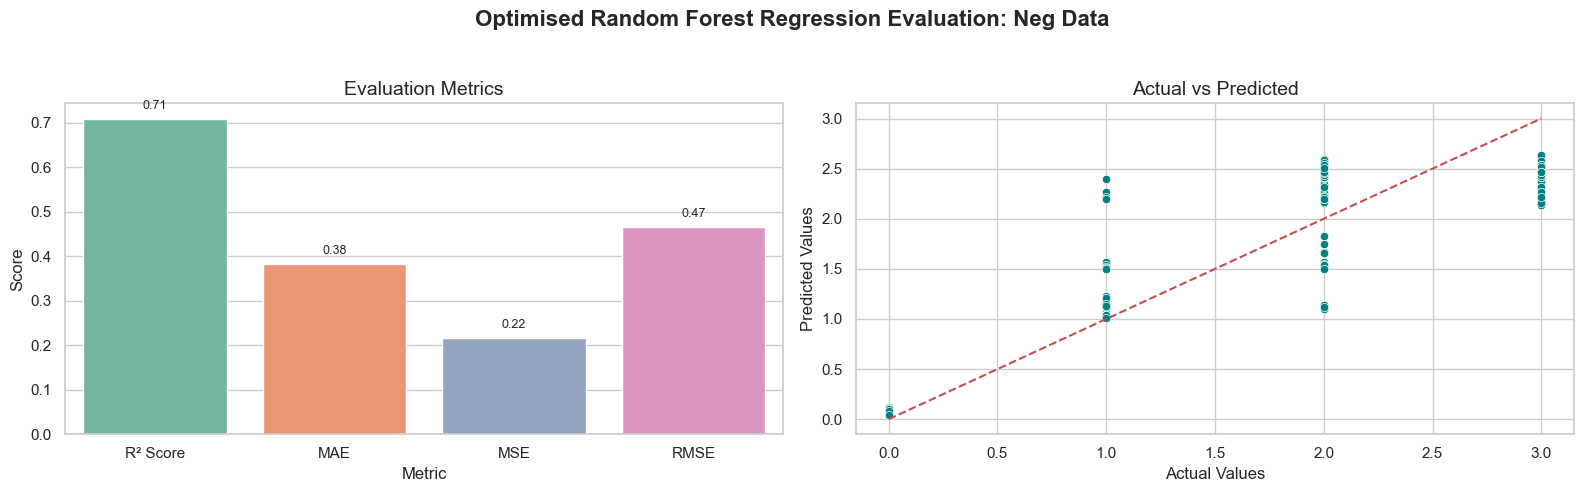

In [96]:
# calculate metrics
y_pred_rfrmo = rfrmo.predict(X_test_prune)
r2_rfrmo = rfrmo.score(X_test_prune, y_test_neg)
mae_rfrmo = mean_absolute_error(y_test_neg, y_pred_rfrmo)
mse_rfrmo = mean_squared_error(y_test_neg, y_pred_rfrmo)
rmse_rfrmo = np.sqrt(mse_rfrmo)

# create metrics DataFrame
metrics_df_final = pd.DataFrame({
    'Metric': ['R² Score', 'MAE', 'MSE', 'RMSE'],
    'Value': [r2_rfrmo, mae_rfrmo, mse_rfrmo, rmse_rfrmo]
})

# figure layout
fig, axs = plt.subplots(1, 2, figsize=(16, 5))
sns.set(style="whitegrid")

# bar chart
bars = sns.barplot(data=metrics_df_final, x='Metric', y='Value', ax=axs[0], palette="Set2")
axs[0].set_title("Evaluation Metrics", fontsize=14)
axs[0].set_ylabel("Score")

# add labels to bars
for bar in bars.patches:
    height = bar.get_height()
    bars.annotate(f'{height:.2f}',
                  xy=(bar.get_x() + bar.get_width() / 2, height),
                  xytext=(0, 5),
                  textcoords="offset points",
                  ha='center', va='bottom', fontsize=9)

# scatter plot
sns.scatterplot(x=y_test_neg, y=y_pred_rfrmo, ax=axs[1], color='teal')
axs[1].plot([y_test_neg.min(), y_test_neg.max()], [y_test_neg.min(), y_test_neg.max()], 'r--')
axs[1].set_title("Actual vs Predicted", fontsize=14)
axs[1].set_xlabel("Actual Values")
axs[1].set_ylabel("Predicted Values")

plt.suptitle("Optimised Random Forest Regression Evaluation: Neg Data", fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

To enhance model performance, feature importance analysis was conducted on the negatively skewed dataset. Based on the results, the dataset was pruned to retain only the most influential predictors.  These selected features were used to subset the training and testing data.  A GridSearchCV was then applied to optimise hyperparameters and retrain the Random Forest Regressor.  While RandomizedSearchCV could have been used for faster exploration across a broader parameter space, GridSearchCV was appropriate here for a more exhaustive and controlled search. 

Final results
The R² score of 0.71 indicates strong predictive power, while the error metrics (MAE: 0.39, MSE: 0.22, RMSE: 0.63) confirm improved accuracy and consistency. These results suggest that focusing on the most influential features, such as support duration, confidence change, and economic status, helped the model generalise more effectively. This refined approach demonstrates the value of targeted feature selection and parameter optimisation in boosting model performance.

This is the end of the experiment, for further insights and information see ICA report. Artefact three.